# 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read data

In [2]:
df = pd.read_csv('preprocessed-data.csv', header=0)
df

FEED_D154  FEED_DS_005  FEED_DS_010  FEED_DS_090  FEED_DS_095  \
0      0.764632     0.451660     0.492331     0.856227     0.884054   
1      0.764632     0.468784     0.513736     0.869070     0.903319   
2      0.796793     0.490190     0.543704     0.892617     0.924725   
3      0.803627     0.477347     0.539423     0.892617     0.920444   
4      0.767446     0.464503     0.509455     0.869070     0.901179   
...         ...          ...          ...          ...          ...   
1903   0.669354     0.336069     0.430682     0.820479     0.865431   
1904   0.694279     0.334571     0.423404     0.869070     0.894663   
1905   0.674581     0.376526     0.446950     0.867786     0.891598   
1906   0.682621     0.352765     0.431538     0.833537     0.877633   
1907   0.696691     0.326865     0.413344     0.842527     0.891760   

      DIESEL_DS_005  DIESEL_DS_010  DIESEL_DS_090  DIESEL_DS_095  FEED_SULFUR  \
0          0.304017       0.364190       0.756963       0.785109     0.345254   
1          0.289711       0.351686       0.747947       0.774728     0.366123   
2          0.264378       0.326981       0.754709       0.784785     0.410468   
3          0.250370       0.310512       0.753099       0.780567     0.413077   
4          0.243217       0.295567       0.756963       0.787704     0.379166   
...             ...            ...            ...            ...          ...   
1903       0.349915       0.391945       0.811698       0.846421     0.414381   
1904       0.336206       0.394995       0.811698       0.849665     0.379926   
1905       0.322794       0.371510       0.723156       0.750073     0.440792   
1906       0.340974       0.389505       0.749235       0.778297     0.431010   
1907       0.338888       0.395909       0.808156       0.843502     0.445901   

      FEED_NITROGEN  FEED_KWATSON  PROCESS_T_WABT  X370PLUS  \
0          0.390263      0.391554        0.449392  0.961200   
1          0.397702      0.410308        0.468677  0.962993   
2          0.385542      0.441622        0.478344  0.963648   
3          0.387116      0.451051        0.487461  0.962736   
4          0.336328      0.396186        0.581682  0.963525   
...             ...           ...             ...       ...   
1903       0.174452      0.494375        0.484103  0.960717   
1904       0.182821      0.458246        0.487541  0.960854   
1905       0.163665      0.498905        0.542996  0.962612   
1906       0.222149      0.480225        0.553571  0.961409   
1907       0.172535      0.446900        0.551423  0.960945   

      PROCESS_PP_H2_OUT  actual.values  PLANT_NAME  CYCLE        DATE  
0              0.668183       0.905872        21.0      1  09/05/2016  
1              0.665435       0.898113        21.0      1  11/05/2016  
2              0.647387       0.918570        21.0      1  18/05/2016  
3              0.648420       0.907989        21.0      1  23/05/2016  
4              0.552071       0.843090        21.0      1  27/07/2016  
...                 ...            ...         ...    ...         ...  
1903           0.329769       0.747859         1.0      1  22/07/2009  
1904           0.313151       0.725991         1.0      1  29/07/2009  
1905           0.318071       0.745743         1.0      1  05/08/2009  
1906           0.317302       0.738689         1.0      1  19/08/2009  
1907           0.293404       0.728813         1.0      1  26/08/2009  

[1908 rows x 19 columns]

# 2. Seperate training set and test set by method `stratified sampling`

In [3]:
from sklearn.model_selection import train_test_split

Y = df['actual.values']
sites = df['PLANT_NAME'].values
Xdf = df.drop(['actual.values', 'CYCLE', 'DATE'], axis=1)
X = Xdf.values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdf, Y, test_size=0.3, random_state=0, stratify=sites)


In [5]:
count_site_train = X_train.groupby('PLANT_NAME').count()
count_site_train.reset_index(inplace=True)
count_site_test = X_test.groupby('PLANT_NAME').count()
count_site_test.reset_index(inplace=True)

## Visualize numbers of elements in each sites in 2 sets

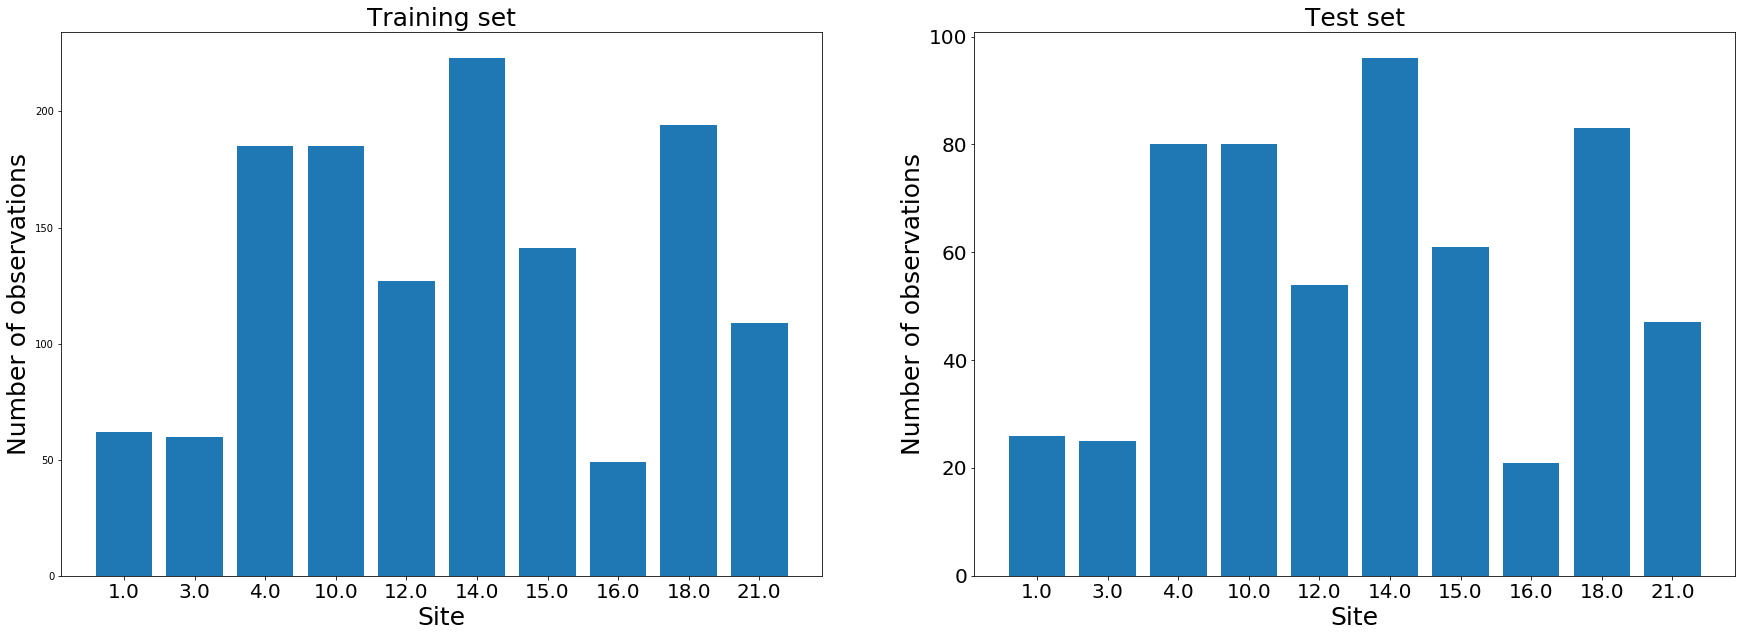

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


In [6]:
fig, (a1, a2) =  plt.subplots(1,2, figsize=(30, 10))

a1.bar(count_site_train['PLANT_NAME'].astype(str), count_site_train['FEED_D154'])
a1.set_title('Training set', fontsize=25)
a1.set_xlabel('Site', fontsize=25)
a1.set_ylabel('Number of observations', fontsize=25)
a1.tick_params(axis="x", labelsize=20)
a2.tick_params(axis="y", labelsize=20)

a2.bar(count_site_test['PLANT_NAME'].astype(str), count_site_test['FEED_D154'])
a2.set_title('Test set', fontsize=25)
a2.set_xlabel('Site', fontsize=25)
a2.set_ylabel('Number of observations', fontsize=25)
a2.tick_params(axis="x", labelsize=20)
a2.tick_params(axis="y", labelsize=20)

plt.show()

fig.savefig('train-test-split.jpg', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)

# 3. Apply Linear Regression & PLS Regression

## 3.1. Global

In [7]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics
import math

lr = LinearRegression().fit(X_train, Y_train)
pls = PLSRegression().fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)
Y_pred_pls = pls.predict(X_test)

RMSE_lr = math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lr))
MAE_lr = metrics.mean_absolute_error(Y_test, Y_pred_lr)


RMSE_pls = math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_pls))
MAE_pls = metrics.mean_absolute_error(Y_test, Y_pred_pls)


print('-----------------------------')
print('Global')
print('-----------------------------')
print('RMSE:')
print('LR = ', RMSE_lr)
print('PLS = ', RMSE_pls)
print('-------------')
print('MAE:')
print('LR = ', MAE_lr)
print('PLS = ', MAE_pls)
print('-----------------------------')
print('-----------------------------')

-----------------------------
Global
-----------------------------
RMSE:
LR =  0.04084905678420349
PLS =  0.04496248685894076
-------------
MAE:
LR =  0.03034324933302697
PLS =  0.03423855363293853
-----------------------------
-----------------------------


## 3.2. Site by site

In [9]:
df_sites = [pd.DataFrame(y) for x,y in df.groupby('PLANT_NAME', as_index=False)]

In [10]:
lr_RMSEs = np.array([])
lr_MAEs = np.array([])
pls_RMSEs = np.array([])
pls_MAEs = np.array([])
for s in df_sites:
    site = s['PLANT_NAME'].values[0]
    Y = s['actual.values'].values
    X = s.drop(['actual.values', 'CYCLE', 'DATE', 'PLANT_NAME'], axis=1).values
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    
    lr = LinearRegression().fit(X_train, Y_train)
    pls = PLSRegression().fit(X_train, Y_train)
    
    Y_pred_lr = lr.predict(X_test)
    Y_pred_pls = pls.predict(X_test)

    RMSE_lr = math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lr))
    MAE_lr = metrics.mean_absolute_error(Y_test, Y_pred_lr)


    RMSE_pls = math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_pls))
    MAE_pls = metrics.mean_absolute_error(Y_test, Y_pred_pls)
    
    print('---------------------')
    print('Site: ', site)
    print('---------------------')
    print('RMSE:')
    print('LR = ', RMSE_lr)
    print('PLS = ', RMSE_pls)
    print('-------------')
    print('MAE:')
    print('LR = ', MAE_lr)
    print('PLS = ', MAE_pls)
    print('-----------------------------')
    print('-----------------------------')
    
    lr_RMSEs = np.append(lr_RMSEs, RMSE_lr)
    lr_MAEs = np.append(lr_MAEs, MAE_lr)
    pls_RMSEs = np.append(pls_RMSEs, RMSE_pls)
    pls_MAEs = np.append(pls_MAEs, MAE_pls)


---------------------
Site:  1.0
---------------------
RMSE:
LR =  0.02252436732807503
PLS =  0.02223363572089407
-------------
MAE:
LR =  0.018863455834622605
PLS =  0.019102307657972564
-----------------------------
-----------------------------
---------------------
Site:  3.0
---------------------
RMSE:
LR =  0.04523540841290938
PLS =  0.04946301047060768
-------------
MAE:
LR =  0.02340362750052709
PLS =  0.025789981289399848
-----------------------------
-----------------------------
---------------------
Site:  4.0
---------------------
RMSE:
LR =  0.028532686725709484
PLS =  0.032489721658016175
-------------
MAE:
LR =  0.022781246587503905
PLS =  0.02588345306062458
-----------------------------
-----------------------------
---------------------
Site:  10.0
---------------------
RMSE:
LR =  0.03179565653309578
PLS =  0.04514518162375374
-------------
MAE:
LR =  0.024245496676472977
PLS =  0.034140279690348045
-----------------------------
-----------------------------
-------

### Calculate RMSE and MAE mean of 2 methods

In [11]:
print('RMSE:-------------------')
print('LR: ', lr_RMSEs.mean())
print('PLS: ', pls_RMSEs.mean())
print('MAE:-------------------')
print('LR: ', lr_MAEs.mean())
print('PLS: ', pls_MAEs.mean())

RMSE:-------------------
LR:  0.028208199067287932
PLS:  0.030316357412004374
MAE:-------------------
LR:  0.020153933000655135
PLS:  0.02178752582595932


# 4. `Exhaustive` method

## 4.1. Prepare

In [12]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

In [13]:
ls_var = Xdf.drop(['PLANT_NAME'], axis=1).columns
Y = df['actual.values']
sites = df['PLANT_NAME'].values

sets = powerset(ls_var)
cols = list(sets)
cols

[('FEED_D154',),
 ('FEED_DS_005',),
 ('FEED_DS_010',),
 ('FEED_DS_090',),
 ('FEED_DS_095',),
 ('DIESEL_DS_005',),
 ('DIESEL_DS_010',),
 ('DIESEL_DS_090',),
 ('DIESEL_DS_095',),
 ('FEED_SULFUR',),
 ('FEED_NITROGEN',),
 ('FEED_KWATSON',),
 ('PROCESS_T_WABT',),
 ('X370PLUS',),
 ('PROCESS_PP_H2_OUT',),
 ('FEED_D154', 'FEED_DS_005'),
 ('FEED_D154', 'FEED_DS_010'),
 ('FEED_D154', 'FEED_DS_090'),
 ('FEED_D154', 'FEED_DS_095'),
 ('FEED_D154', 'DIESEL_DS_005'),
 ('FEED_D154', 'DIESEL_DS_010'),
 ('FEED_D154', 'DIESEL_DS_090'),
 ('FEED_D154', 'DIESEL_DS_095'),
 ('FEED_D154', 'FEED_SULFUR'),
 ('FEED_D154', 'FEED_NITROGEN'),
 ('FEED_D154', 'FEED_KWATSON'),
 ('FEED_D154', 'PROCESS_T_WABT'),
 ('FEED_D154', 'X370PLUS'),
 ('FEED_D154', 'PROCESS_PP_H2_OUT'),
 ('FEED_DS_005', 'FEED_DS_010'),
 ('FEED_DS_005', 'FEED_DS_090'),
 ('FEED_DS_005', 'FEED_DS_095'),
 ('FEED_DS_005', 'DIESEL_DS_005'),
 ('FEED_DS_005', 'DIESEL_DS_010'),
 ('FEED_DS_005', 'DIESEL_DS_090'),
 ('FEED_DS_005', 'DIESEL_DS_095'),
 ('FEED_DS

## 4.2. Run 2^15 regressions

In [14]:
dic = []

for c in cols:
    d = {'variables': c}
    subXdf = Xdf[np.append(np.array(c), ['PLANT_NAME'])]
    X_train, X_test, Y_train, Y_test = train_test_split(subXdf, Y, test_size=0.3, random_state=0, stratify=sites)
    
    X_train = X_train.values
    X_test = X_test.values
    Y_train = Y_train.values
    Y_test = Y_test.values
    
    lr = LinearRegression().fit(X_train, Y_train)

    Y_pred = lr.predict(X_test)

    RMSE = math.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
    MAE = metrics.mean_absolute_error(Y_test, Y_pred)
    
    d.update({'RMSE': RMSE, 'MAE': MAE})
    print(d)
    
    dic.append(d)
    
      

{'variables': ('FEED_D154',), 'RMSE': 0.05577797105513892, 'MAE': 0.04368060831971778}
{'variables': ('FEED_DS_005',), 'RMSE': 0.0765044281388195, 'MAE': 0.06309460054394964}
{'variables': ('FEED_DS_010',), 'RMSE': 0.0759192527474208, 'MAE': 0.06239144652625446}
{'variables': ('FEED_DS_090',), 'RMSE': 0.07677696735157778, 'MAE': 0.06379106735913583}
{'variables': ('FEED_DS_095',), 'RMSE': 0.07693013824009386, 'MAE': 0.06374495859538142}
{'variables': ('DIESEL_DS_005',), 'RMSE': 0.07553636374973575, 'MAE': 0.06340099513898555}
{'variables': ('DIESEL_DS_010',), 'RMSE': 0.07426176206258236, 'MAE': 0.0621939610601368}
{'variables': ('DIESEL_DS_090',), 'RMSE': 0.05915924127813467, 'MAE': 0.04712973452587995}
{'variables': ('DIESEL_DS_095',), 'RMSE': 0.05949257691347678, 'MAE': 0.04752235899983476}
{'variables': ('FEED_SULFUR',), 'RMSE': 0.0742569583610978, 'MAE': 0.06330271410958535}
{'variables': ('FEED_NITROGEN',), 'RMSE': 0.06953851492583815, 'MAE': 0.053839238329206084}
{'variables': ('

{'variables': ('DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05601030582851509, 'MAE': 0.04334822989828125}
{'variables': ('DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.05583084878316407, 'MAE': 0.04503863445402593}
{'variables': ('DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.05909402956956715, 'MAE': 0.04697521886046037}
{'variables': ('DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.059194662635581395, 'MAE': 0.047152435417160965}
{'variables': ('DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05873949367373861, 'MAE': 0.04629067730714583}
{'variables': ('DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05941172072475271, 'MAE': 0.047503140922451996}
{'variables': ('DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05656002414126955, 'MAE': 0.04372305673944408}
{'variables': ('DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05680561564983501, 'MAE': 0.04544658460857286}
{'variables': ('DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05942401326185971, 'MAE': 0.04738646744749176}
{'variables': ('DIESEL_DS_095', 'X370

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_095'), 'RMSE': 0.04831760154636612, 'MAE': 0.037158683180187134}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR'), 'RMSE': 0.050982158259435535, 'MAE': 0.03859327028411774}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_NITROGEN'), 'RMSE': 0.04980526649999871, 'MAE': 0.03759966576120946}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_KWATSON'), 'RMSE': 0.052702558609140866, 'MAE': 0.042507514953496195}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'PROCESS_T_WABT'), 'RMSE': 0.05172111980849171, 'MAE': 0.04129200788974673}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'X370PLUS'), 'RMSE': 0.05260438671091328, 'MAE': 0.04233819742324477}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052357570913191834, 'MAE': 0.04192850499711973}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.04783375094302092, 'MAE': 0.0372891199074975}
{'variables': ('FEED_D154', 'DIESEL_DS_

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'FEED_NITROGEN'), 'RMSE': 0.06547609772750762, 'MAE': 0.05094526610330918}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'FEED_KWATSON'), 'RMSE': 0.062076512867543496, 'MAE': 0.050882945438590746}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'PROCESS_T_WABT'), 'RMSE': 0.07503303137930671, 'MAE': 0.06288444654752987}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'X370PLUS'), 'RMSE': 0.07518282585043369, 'MAE': 0.06298063221577051}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07507602183602018, 'MAE': 0.06301045628354106}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.05686568159954217, 'MAE': 0.044668423207973026}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.05695951554351985, 'MAE': 0.04516963266582479}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.0717093271337746, 'MAE': 0.06179032773288909}
{'variables': ('FEED_DS_0

{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.058975035222260976, 'MAE': 0.046961869306456905}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.056011519633437964, 'MAE': 0.04335170777290995}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.055879022561952985, 'MAE': 0.04504012916982669}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.05912661530606751, 'MAE': 0.04705788616587096}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.05919177595904837, 'MAE': 0.047132917054091054}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058762917135710246, 'MAE': 0.04637249471083584}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05943272128455317, 'MAE': 0.047409635116851694}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05653001293893043, 'MAE': 0.04367237106125493}
{'variables': ('FEED_D

{'variables': ('FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.0672368464688243, 'MAE': 0.05247902289558267}
{'variables': ('FEED_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.06884008778772233, 'MAE': 0.05309348836831057}
{'variables': ('FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06889156299432887, 'MAE': 0.053298316835075576}
{'variables': ('FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0630924311174895, 'MAE': 0.05010944278408882}
{'variables': ('FEED_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.06313854769478579, 'MAE': 0.04999203752312391}
{'variables': ('FEED_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06292968830524479, 'MAE': 0.04986792567943388}
{'variables': ('FEED_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07611511515124546, 'MAE': 0.06305937694920835}
{'variables': ('FEED_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07607596361180877, 'MAE': 0.0631928266123555}
{'variables': ('FEED_DS_090'

{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.056828159706697585, 'MAE': 0.044797947750237176}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.052414692098512315, 'MAE': 0.04026675423532645}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.05243243912609409, 'MAE': 0.04149082514917987}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.05630478712486202, 'MAE': 0.04389962194480605}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.05644839085843447, 'MAE': 0.044451606343205476}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056726140254425995, 'MAE': 0.04426108188895064}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.056912678255605725, 'MAE': 0.04538062697555585}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.052645507951199315, 'MAE': 0.04066390062330734}
{'vari

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.05332404430537694, 'MAE': 0.03968804383571393}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_KWATSON'), 'RMSE': 0.0535875075600792, 'MAE': 0.04040741285197234}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'PROCESS_T_WABT'), 'RMSE': 0.054398001177888546, 'MAE': 0.04160627058421553}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'X370PLUS'), 'RMSE': 0.054362417361684214, 'MAE': 0.04115516626373899}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05415458034607124, 'MAE': 0.04160782505628182}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095'), 'RMSE': 0.05409433348086527, 'MAE': 0.04101190623863433}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005'), 'RMSE': 0.05054392415895217, 'MAE': 0.03886832848669481}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_01

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05474274392791995, 'MAE': 0.0411009744421458}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'X370PLUS'), 'RMSE': 0.054798968782851176, 'MAE': 0.04072831129114315}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05453193131403054, 'MAE': 0.0411602468916223}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010'), 'RMSE': 0.04925250932678388, 'MAE': 0.03754123691093134}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090'), 'RMSE': 0.0459130246763675, 'MAE': 0.0341971653203917}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095'), 'RMSE': 0.04693583484283707, 'MAE': 0.034838497893954816}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR'), 'RMSE': 0.04994275137731248, 'MAE': 0.03654390096124903}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05172405069912753, 'MAE': 0.040586918388683765}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.052265826987410065, 'MAE': 0.04117152069161995}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05116404134139962, 'MAE': 0.039993649797096194}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.053610499507501706, 'MAE': 0.03960236839306041}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05445019413326223, 'MAE': 0.039991183796177734}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.054158704102560934, 'MAE': 0.03984724960626872}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05426772291797516, 'MAE': 0.03980707292998959}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_SULFUR', 'PRO

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04602558462260805, 'MAE': 0.034780083906620324}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04837583509907907, 'MAE': 0.03728330589333252}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.046361689814101735, 'MAE': 0.034788903871994965}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.047899799418438825, 'MAE': 0.036800255207929206}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047580049341577085, 'MAE': 0.036117651581752126}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.049895710711651615, 'MAE': 0.03733710266000206}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05074490192880873, 'MAE': 0.03781896104547576}
{'variables': ('FEED_D154', 'DIESEL_DS_

{'variables': ('FEED_D154', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.054623347658452566, 'MAE': 0.04011672683098844}
{'variables': ('FEED_D154', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.054641027547678064, 'MAE': 0.039978325604620925}
{'variables': ('FEED_D154', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0539415086013968, 'MAE': 0.03966441117061375}
{'variables': ('FEED_D154', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05455839093703705, 'MAE': 0.04019475789520683}
{'variables': ('FEED_D154', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053958219365977035, 'MAE': 0.039770688670501854}
{'variables': ('FEED_D154', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053987986746961814, 'MAE': 0.03975453260813859}
{'variables': ('FEED_D154', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05407347744034415, 'MAE': 0.04056670700945183}
{'variables': ('FEED_D154', 'FEED_NITROGEN', 'FEED_

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.06724009498409987, 'MAE': 0.05223888300553846}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.06811702626755839, 'MAE': 0.05224416172619388}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06827046081808373, 'MAE': 0.052179396670861786}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.06364551257362742, 'MAE': 0.05144536053014371}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.06359170113975789, 'MAE': 0.05120618495773494}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06299611469231256, 'MAE': 0.051312394051494084}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07503554534477715, 'MAE': 0.06136620290150826}
{'variables': ('FEED_DS_005', 'FEED_DS_010', '

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT'), 'RMSE': 0.07483352088801024, 'MAE': 0.0630750811056243}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'X370PLUS'), 'RMSE': 0.07497066460063975, 'MAE': 0.06324741933973173}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07489215424823692, 'MAE': 0.06324009100660485}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.05683939382200817, 'MAE': 0.04464111017722563}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.056910197103500974, 'MAE': 0.04507086262019668}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.07161756782725454, 'MAE': 0.061374468213498}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.0623818183681983, 'MAE': 0.04788965197400204}
{'variables': ('FEED_DS_005', 'FEED_DS_095', '

{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05322961438662985, 'MAE': 0.041917585819237754}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.056235220314096224, 'MAE': 0.04436158114057819}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05641043267359287, 'MAE': 0.04468552274330103}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056625482201022925, 'MAE': 0.04442218814013457}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05729205363615913, 'MAE': 0.04380983371030964}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05960145616350554, 'MAE': 0.04754313690586245}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.07166901276151308, 'MAE': 0.06179974444333218}
{'variables': ('FEED_DS_005', '

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095'), 'RMSE': 0.059061016802769595, 'MAE': 0.047149303400427396}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR'), 'RMSE': 0.0732144428158272, 'MAE': 0.06221353853051155}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.06635703439610569, 'MAE': 0.051071375872775354}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_KWATSON'), 'RMSE': 0.06323739969916085, 'MAE': 0.050199842625660566}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.07433821047943805, 'MAE': 0.06155547051887146}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'X370PLUS'), 'RMSE': 0.07423049734131575, 'MAE': 0.06129525170171127}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07402426889839868, 'MAE': 0.061773256856198756}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_D

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05914495647923087, 'MAE': 0.04711378918098054}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05652857749435432, 'MAE': 0.043668132442064765}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.055399766445899216, 'MAE': 0.044083769218752705}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.059324977969695325, 'MAE': 0.047237469364241856}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05943532992758117, 'MAE': 0.047357564791025125}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058784363440673996, 'MAE': 0.046382816458345674}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.06264795590730285, 'MAE': 0.04842510481206707}
{'variables': ('FEED_DS_010', 'FEED_DS

{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.06348551446570896, 'MAE': 0.04948900605336596}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.063531208992796, 'MAE': 0.04924602711327542}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06360348393715416, 'MAE': 0.04955828258993183}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05918204116738341, 'MAE': 0.048887976143053846}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.059972661484974696, 'MAE': 0.04948669882758948}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05991436446924169, 'MAE': 0.04943117237023867}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07334512833852815, 'MAE': 0.061363500408987935}
{'variables': ('FEED_DS_010', 'DI

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.05813424146739878, 'MAE': 0.04649869975534143}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05540790014608285, 'MAE': 0.043091408158261665}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.05444510184888236, 'MAE': 0.04425187759733711}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.05803249754376212, 'MAE': 0.04640576465012885}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.05830099728867021, 'MAE': 0.04666831210958138}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05735996167001499, 'MAE': 0.045547156632952945}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05894097077697722, 'MAE': 0.04712773597365264}
{'variables': ('FEED_DS_090', 'FEED_DS_095',

{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05653930650332144, 'MAE': 0.04452078866753082}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.057096837379708845, 'MAE': 0.04375288994786497}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05845492193425609, 'MAE': 0.04627003878196344}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.07161567463406164, 'MAE': 0.0617423761141267}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.07163961675003057, 'MAE': 0.06173128021451041}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07157471524862487, 'MAE': 0.06170630971969851}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05148188325170503, 'MAE': 0.038553969380072335}
{'variables': ('FEED_DS_090', 'DIE

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.056328234498961904, 'MAE': 0.04442440010566846}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.07032427805238034, 'MAE': 0.057470866210101564}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.06329375659926881, 'MAE': 0.0492315868099551}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON'), 'RMSE': 0.0580849416897417, 'MAE': 0.04558726247974104}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT'), 'RMSE': 0.07261608326737273, 'MAE': 0.05852168321335479}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'X370PLUS'), 'RMSE': 0.07260950857647458, 'MAE': 0.0585701800004243}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0726377839011775, 'MAE': 0.05863836793609493}
{'variables': ('FEED_DS_095', 'D

{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05342424079813669, 'MAE': 0.0429431983569217}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05909026742328436, 'MAE': 0.04692106131511951}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058697644803042695, 'MAE': 0.046240264443068994}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05873049121811935, 'MAE': 0.046272874422593806}
{'variables': ('FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05518584692816349, 'MAE': 0.04241435270013598}
{'variables': ('FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.054868130252224166, 'MAE': 0.043799922850586225}
{'variables': ('FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05903473552199088, 'MAE': 0.047049303977523445}
{'variables': ('FEED_DS_0

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04984723371883706, 'MAE': 0.03864265263145355}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05076051975447099, 'MAE': 0.03972268177352525}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051058571106359654, 'MAE': 0.03946914533526305}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05505561416201816, 'MAE': 0.04273420707416558}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05534568596897806, 'MAE': 0.04275993382699561}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05538973790155408, 'MAE': 0.04289300144488023}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05059668696459771, 'MAE': 0.03856720485858779}
{'variables': ('D

{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055937566673767626, 'MAE': 0.04418419530852164}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056034112884545094, 'MAE': 0.04390479119953899}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0560855004580298, 'MAE': 0.044012469003413046}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.051863073244874186, 'MAE': 0.03885759113967197}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.057224322914827645, 'MAE': 0.043797364915162104}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05717704495877229, 'MAE': 0.04372859055763295}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05718109269736544, 'MAE': 0.04385511739074031}
{'variables': ('D

{'variables': ('DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05581886912176231, 'MAE': 0.04444064196116776}
{'variables': ('DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058895033532741586, 'MAE': 0.04647797687362538}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05879228505830189, 'MAE': 0.04469683489182288}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05876898692068593, 'MAE': 0.04413066979470671}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05868545146785996, 'MAE': 0.04437656662002353}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0622815992976258, 'MAE': 0.04789669736802357}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0623497094972389, 'MAE': 0.04801249684602193}
{'variables': ('FEED_SULFUR'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.04891550543150482, 'MAE': 0.03736418323063212}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.049627154532068014, 'MAE': 0.03846899835435964}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.04990678706796392, 'MAE': 0.03841863158646717}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04931746671221091, 'MAE': 0.038147418543771565}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04969375963766114, 'MAE': 0.0375383108139793}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05003469885255774, 'MAE': 0.03782953645318129}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.048959980191231905, 'MAE': 0.03721016028279273}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.0490724548859893, 'MAE': 0.03756721507173953}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.049289411580843726, 'MAE': 0.0379311141291021}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.04957831031528075, 'MAE': 0.03789129703015847}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04911090591069602, 'MAE': 0.037745151846740536}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04963526703142299, 'MAE': 0.03755540297897043}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048134152492757584, 'MAE': 0.03720761220616737}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.044327965193972564, 'MAE': 0.032945719919116406}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.0441893383167678, 'MAE': 0.032549421077559794}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.04408970126993648, 'MAE': 0.03281276133702503}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.04495721613669274, 'MAE': 0.03334008518288246}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.043899355711410244, 'MAE': 0.03256814148228067}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.048036682318634755, 'MAE': 0.03678037677547085}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04820090719036779, 'MAE': 0.03708022919722845}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.04861201387837836, 'MAE': 0.03780899032769732}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.04883651578734086, 'MAE': 0.03777044372597037}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048541917183607064, 'MAE': 0.037707946771888365}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04869544342266143, 'MAE': 0.03707857771676233}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.053626894080005476, 'MAE': 0.03959640125943358}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_KWATSON'), 'RMSE': 0.0541058334120018, 'MAE': 0.04049593565049033}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05489229952108776, 'MAE': 0.04122688693223016}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'X370PLUS'), 'RMSE': 0.054894744888353296, 'MAE': 0.0407962047729445}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05462806547378932, 'MAE': 0.04116518431857074}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010'), 'RMSE': 0.049143149334789284, 'MAE': 0.036797622240329175}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090'), 'RMSE': 0.045885

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.04652125316341597, 'MAE': 0.03478768544633007}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.048189997008727295, 'MAE': 0.035169267050147196}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.04752351125622412, 'MAE': 0.03527107801223531}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON'), 'RMSE': 0.04919289954980469, 'MAE': 0.03738570547533761}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'PROCESS_T_WABT'), 'RMSE': 0.0489818983819188, 'MAE': 0.03763700959124388}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'X370PLUS'), 'RMSE': 0.04976903073795772, 'MAE': 0.038014766903200256}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04924903756346355, 'MAE': 0.03598899690926795}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05001242790128728, 'MAE': 0.036534146166095856}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.049850734982345005, 'MAE': 0.03654883724725609}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04997127419349344, 'MAE': 0.03655112876628895}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04986475174710258, 'MAE': 0.03661471812039487}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.049239717014567405, 'MAE': 0.03638630045784513}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT'), '

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.050996002934878104, 'MAE': 0.03898641229428149}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050449999470430225, 'MAE': 0.038960828518315505}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050585069152748484, 'MAE': 0.038810013991919155}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05330918387677548, 'MAE': 0.038811177761907144}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05347138484179411, 'MAE': 0.03882663500445196}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05345951286527649, 'MAE': 0.03869508633967471}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05049976525906878, 'MAE': 0.04012195939308612}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.04726588501350244, 'MAE': 0.036612980341471646}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.045153869766806465, 'MAE': 0.034159395781717464}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.044794475417995465, 'MAE': 0.03391660490273204}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.04756680521156044, 'MAE': 0.036794484792723424}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.0454808638156037, 'MAE': 0.034253314892775784}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X37

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05070153678104393, 'MAE': 0.03903522518199714}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05051475418165677, 'MAE': 0.038692332073295053}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05074177685788756, 'MAE': 0.03881178953735231}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04931901153915552, 'MAE': 0.03735297007039393}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05089740361832155, 'MAE': 0.03881198382323363}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05065826566118116, 'MAE': 0.0385241548174098}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE':

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04836961812017333, 'MAE': 0.037752539746075835}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.04627598246347262, 'MAE': 0.03498520032813392}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.047913245587828675, 'MAE': 0.03734560298805728}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047558853331805186, 'MAE': 0.03668242707709522}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04783862686985345, 'MAE': 0.03567525083378675}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.0490596958812618, 'MAE': 0.036583039828197696}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051160565705325164, 'MAE': 0.039762887673072775}
{'variables': ('FEED_D154', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.053890304439975306, 'MAE': 0.03972611391296958}
{'variables': ('FEED_D154', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.053733993598671786, 'MAE': 0.03971704689289976}
{'variables': ('FEED_D154', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05382647891971635, 'MAE': 0.03965918146490831}
{'variables': ('FEED_D154', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053330934725400486, 'MAE': 0.039275728785473564}
{'variables': ('FEED_D154', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.054549683839655395, 'MAE': 0.04004945481053631}
{'variables': ('FEED_D154', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE'

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04694187968405157, 'MAE': 0.035764750298118965}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.045139558521041276, 'MAE': 0.0339284790877377}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04553907896893634, 'MAE': 0.03433750434610763}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04458056615830922, 'MAE': 0.033383074315533647}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04537549418597002, 'MAE': 0.03410264957986524}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0451974875576427, 'MAE': 0.03373949841141965}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FE

{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04556574628491148, 'MAE': 0.034957448387806796}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04459052248545115, 'MAE': 0.0336491272948884}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.045305286064477014, 'MAE': 0.03465170711830187}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04529018168622066, 'MAE': 0.0344492900474665}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04623998158767895, 'MAE': 0.035025941044295926}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04790138944595308, 'MAE': 0.037355290512490306}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PR

{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05093135848356003, 'MAE': 0.03877823797867236}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04999906310610093, 'MAE': 0.037866632210678645}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05073608496794221, 'MAE': 0.038419701710506085}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04995425560760939, 'MAE': 0.03763432655750172}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05000654439171305, 'MAE': 0.03762830642255954}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05178033939290197, 'MAE': 0.040316336982727595}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'P

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07461096301619832, 'MAE': 0.06142422874490138}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07454421368930687, 'MAE': 0.061819525838203396}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07468804987325568, 'MAE': 0.06159966334297452}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010'), 'RMSE': 0.07124795240800398, 'MAE': 0.05737280237353553}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090'), 'RMSE': 0.056108298691962044, 'MAE': 0.043885787445911005}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095'), 'RMSE': 0.0563684861281649, 'MAE': 0.044422804137003336}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SU

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.05570974895997269, 'MAE': 0.043338379548103455}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05194596224050444, 'MAE': 0.039696779428495324}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.05096585123333353, 'MAE': 0.03963142468624365}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.05527635521750967, 'MAE': 0.04294935536051331}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.05547359985625209, 'MAE': 0.04322253102634319}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055893358662950955, 'MAE': 0.043270128184259}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095',

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07255175768938801, 'MAE': 0.06068101982319197}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07253961067926766, 'MAE': 0.06068686334995866}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05878200609479802, 'MAE': 0.04678653418253043}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05609719438282044, 'MAE': 0.04352333396104251}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05486581721599738, 'MAE': 0.04421912436288108}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05902056109866957, 'MAE': 0.04698387929493134}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_0

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095'), 'RMSE': 0.055904596969614, 'MAE': 0.044027441932513886}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR'), 'RMSE': 0.07181475848446423, 'MAE': 0.06206121370074091}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN'), 'RMSE': 0.0620007031943162, 'MAE': 0.0480503947840745}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON'), 'RMSE': 0.06066925317546558, 'MAE': 0.048599594275860226}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT'), 'RMSE': 0.07317129788799917, 'MAE': 0.062191589515925745}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'X370PLUS'), 'RMSE': 0.07307855965374842, 'MAE': 0.062249969631748434}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_PP_H2_OUT

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05159654381895142, 'MAE': 0.0397743256164793}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.051689114854646744, 'MAE': 0.03966282707583467}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.055535378911437304, 'MAE': 0.04349813065088978}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05575330789882344, 'MAE': 0.04378956603115911}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05602034882178058, 'MAE': 0.04360796627827016}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.058457430774556896, 'MAE': 0.04476438883566124}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05589508536315755, 'MAE': 0.04357556419505081}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.055902652768399765, 'MAE': 0.04325353673787491}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05537755972972697, 'MAE': 0.04243108216342443}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05407169382607095, 'MAE': 0.04368609096333213}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05437100387466357, 'MAE': 0.04382410498502026}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053796043762726495, 'MAE': 0.04325439706386187}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'PROCESS_T_WABT

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05167866772646448, 'MAE': 0.03969890364095071}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05563118223535534, 'MAE': 0.04345400887988827}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05584256739960085, 'MAE': 0.043764703855461544}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05611028311944593, 'MAE': 0.043559753802936}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.058629125905661314, 'MAE': 0.04483047256466207}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.059759729809729, 'MAE': 0.04730721102705401}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCES

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.0560649053588911, 'MAE': 0.04366785946461769}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05608126427888548, 'MAE': 0.04335992708816684}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05567464095253629, 'MAE': 0.04268062987957157}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0537799033893307, 'MAE': 0.04321871570569941}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05423361561486856, 'MAE': 0.043541518973832516}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053423100569591674, 'MAE': 0.04273202432021741}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT',

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.0518225147241255, 'MAE': 0.03950686013462323}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.051286071637075825, 'MAE': 0.039594987689176235}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.055315935157080165, 'MAE': 0.042984767575434554}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05542300777808982, 'MAE': 0.043218366168221604}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05588719349810182, 'MAE': 0.043298447885126774}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.049737671676392634, 'MAE': 0.03731587521791715}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090

{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.052220009777485366, 'MAE': 0.04096774924379319}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05612407779142847, 'MAE': 0.04412034444366735}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.0562395681448699, 'MAE': 0.044377360116070345}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05654992678389779, 'MAE': 0.0443105874355616}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05024913977925456, 'MAE': 0.038253281496081044}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05131461079020767, 'MAE': 0.04082785469229246}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED

{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.056093966640816215, 'MAE': 0.04373594303062657}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05611908717839664, 'MAE': 0.04345594163163157}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055721823297489724, 'MAE': 0.04270336940869608}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.055340185218690045, 'MAE': 0.0447774668601025}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05552412487361511, 'MAE': 0.0448937909326325}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05490356604495876, 'MAE': 0.04412427422837243}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'P

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN'), 'RMSE': 0.06174996553028551, 'MAE': 0.04790397440225702}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON'), 'RMSE': 0.06039364220262175, 'MAE': 0.04864935993276564}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT'), 'RMSE': 0.0722294041930246, 'MAE': 0.06181604947214837}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'X370PLUS'), 'RMSE': 0.07221523346137511, 'MAE': 0.06180828196917793}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07204156832543343, 'MAE': 0.06173759294397236}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.05574731841282663, 'MAE': 0.04421311610770954}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_09

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.051718431638768186, 'MAE': 0.04001992513748955}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.05142966365496, 'MAE': 0.040275132328294445}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.056221705589405924, 'MAE': 0.04407029375622964}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.05635925660098924, 'MAE': 0.04449782759281234}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05665204555505456, 'MAE': 0.04435384932687019}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05691872794168674, 'MAE': 0.04530530145670952}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05578241370194461, 'MAE': 0.04272873077115053}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05510326018853856, 'MAE': 0.043985543406684396}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05550131523792826, 'MAE': 0.044226009454763904}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05459640613455175, 'MAE': 0.0433569905705859}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.059479097760731896, 'MAE': 0.047346764349046375}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05885423874359477, 'MAE': 0.046493554872628864}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'X370PLU

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056780883768844354, 'MAE': 0.044399507653378474}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.056809391787912555, 'MAE': 0.045041879785722966}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05245002914468317, 'MAE': 0.04082067783443688}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.051970673189977404, 'MAE': 0.040522263155424565}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.056188195725079326, 'MAE': 0.044388704806322905}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.056453898458242946, 'MAE': 0.04486953013059319}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05747707967889679, 'MAE': 0.043316847772609954}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.06240449232319673, 'MAE': 0.04812561531447171}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.06248270526113229, 'MAE': 0.04801485268438959}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06266893781256914, 'MAE': 0.04841589426834861}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.06239396359871802, 'MAE': 0.04846779701447892}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.06233328446973292, 'MAE': 0.04815541059062202}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055878313837825884, 'MAE': 0.04334131606420989}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04971789072045121, 'MAE': 0.03734856414684309}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05017427645965103, 'MAE': 0.03954817148694042}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.054944319207362806, 'MAE': 0.042410799265070576}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05536016164658912, 'MAE': 0.043011109939061806}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055836338200936274, 'MAE': 0.04323889616480446}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'F

{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.052350881691157314, 'MAE': 0.04129667732165825}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05611531966433969, 'MAE': 0.044189232691879014}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05631273869439524, 'MAE': 0.04462719995246949}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05653002193376309, 'MAE': 0.044361592538402266}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05025042200215033, 'MAE': 0.03825020161038381}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.0509641882652883, 'MAE': 0.0408014152566972}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED

{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05856680408984348, 'MAE': 0.04627601174718896}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05863909845497942, 'MAE': 0.04634765493308047}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.052169064201155205, 'MAE': 0.04055157792141243}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05218189827875776, 'MAE': 0.040470565832334875}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05119351683332564, 'MAE': 0.03928425118141099}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.056072901444309604, 'MAE': 0.04367681240614669}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PRO

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05050253544579169, 'MAE': 0.03860920843780345}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.050756181212473876, 'MAE': 0.03963349413050621}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.0534882285890066, 'MAE': 0.04171702608812943}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.05428524827097309, 'MAE': 0.04271771433334076}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05436090031234028, 'MAE': 0.04200409079348953}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05584781293096255, 'MAE': 0.04425092862106768}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.055265803738143264, 'MAE': 0.04301441520390058}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05412626334054018, 'MAE': 0.04425138946802909}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.058079162833086485, 'MAE': 0.04644118194505568}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05835093776683975, 'MAE': 0.04670914642041909}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05744974455922649, 'MAE': 0.04562315053656509}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05413813153816488, 'MAE': 0.04156832205501548}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07243802803755862, 'MAE': 0.058868922870736355}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07257063701148145, 'MAE': 0.05892066589791896}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07251616266778516, 'MAE': 0.0589549131818813}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.056012824470960676, 'MAE': 0.04418528019812971}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05093861337494173, 'MAE': 0.03881852254985424}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05075435822006487, 'MAE': 0.03976671520040374}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'D

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05997025246806567, 'MAE': 0.048131703822434035}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05997434602131151, 'MAE': 0.04813388908159914}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06026645197766561, 'MAE': 0.048534833303817956}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07476558301262295, 'MAE': 0.06316988506388505}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05679274068960721, 'MAE': 0.04520080406416776}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.051865644369407375, 'MAE': 0.04001089312658081}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'D

{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05443401683254031, 'MAE': 0.04166571431010589}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05449414983201779, 'MAE': 0.041759919558877256}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054150890453567566, 'MAE': 0.041203378356123074}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.053845021097699425, 'MAE': 0.04379544807021151}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05400840965179256, 'MAE': 0.04391684733770897}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05307205785225437, 'MAE': 0.04288369832339606}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WA

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07262733646906419, 'MAE': 0.058632698418034646}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07258793249544121, 'MAE': 0.05863470169948826}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.056129086706875435, 'MAE': 0.04421304982643388}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05149177702262105, 'MAE': 0.03912092470698552}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05044400845240491, 'MAE': 0.03951235726683852}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05537980826578566, 'MAE': 0.04315179284259455}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_09

{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.056089509218521585, 'MAE': 0.04384062980820017}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05627684378145813, 'MAE': 0.0437759185026005}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05631773690072671, 'MAE': 0.04399282524321695}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05087588054853609, 'MAE': 0.03940056186701646}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05102245014907298, 'MAE': 0.04027472439658558}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05579718782944289, 'MAE': 0.04385400533908273}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_

{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05866249298565446, 'MAE': 0.046307988255337565}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.0515507337636416, 'MAE': 0.04011336019497006}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.054412749751924956, 'MAE': 0.041589572548103054}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05447862710088693, 'MAE': 0.0417202459116822}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054145083779184554, 'MAE': 0.04112703229983942}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.053621129112566494, 'MAE': 0.04341590902037064}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATS

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05083451876855452, 'MAE': 0.03950232393152413}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05499227886052497, 'MAE': 0.04258262522463641}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05517087020494139, 'MAE': 0.04306500351430471}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0554951745649911, 'MAE': 0.0427352362069196}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04981101762370472, 'MAE': 0.0376374497367583}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.050307975965273775, 'MAE': 0.03899030376987637}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07251362583119554, 'MAE': 0.05887677836873893}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04967665146393286, 'MAE': 0.037349915516449186}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05019163846952893, 'MAE': 0.039421043283163315}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05493058321399928, 'MAE': 0.042595941944325415}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05543290477843885, 'MAE': 0.04349458813813218}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055750922292283345, 'MAE': 0.043268228452619}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_0

{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.053454486390707115, 'MAE': 0.039625484348205}
{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.053142480894042596, 'MAE': 0.0396087765009536}
{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05337340388188542, 'MAE': 0.03969625477828567}
{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.058761593483907956, 'MAE': 0.044901046176203344}
{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05863187763533415, 'MAE': 0.04481784599449386}
{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05865644722229387, 'MAE': 0.04482273233073665}
{'variables': ('DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PR

{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051794807406209065, 'MAE': 0.04043696613550761}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055768842827253196, 'MAE': 0.04367259215470321}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05171564421061852, 'MAE': 0.038768647057051776}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0513487087189707, 'MAE': 0.03867248569217332}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051804621894674406, 'MAE': 0.03887465275947532}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05717196343725533, 'MAE': 0.0437501408819014}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PR

{'variables': ('DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0557564988647545, 'MAE': 0.0443837644825524}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05878946886646837, 'MAE': 0.044513484939569935}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05855107977267391, 'MAE': 0.044515562020900075}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05860232691566966, 'MAE': 0.044015758254321774}
{'variables': ('FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06229456567781992, 'MAE': 0.047840915728838584}
{'variables': ('FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06513680350998499, 'MAE': 0.05145386591510213}
{'variables': ('FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT',

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.053475088735515784, 'MAE': 0.03926987808217404}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05325577163002513, 'MAE': 0.03964356197533828}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05383687038176938, 'MAE': 0.0404039634877125}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.053802063137623556, 'MAE': 0.03999182603420223}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0537414212337243, 'MAE': 0.04054818910311182}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05424540148970573, 'MAE': 0.04047352830316488}
{'variables': ('FE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05405740921221015, 'MAE': 0.0405968189356985}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.045289485712749634, 'MAE': 0.03439209055281042}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.046134703744178975, 'MAE': 0.035255492912871216}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.046711769496553084, 'MAE': 0.03457461804807348}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.046446874213146756, 'MAE': 0.035412824960354014}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON'), 'RMSE': 0.047211969401133126, 'MAE': 0.03606131104244869

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.048603025886263244, 'MAE': 0.03779429226859011}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.04882826290198473, 'MAE': 0.037756923083114}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04853005055727912, 'MAE': 0.03767470444608165}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04869600270320524, 'MAE': 0.03707348303835609}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.048590542703592025, 'MAE': 0.037011479851360225}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04886907902699274, 'MAE': 0.03732997829578003}
{'v

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053647232063148226, 'MAE': 0.04052114134497053}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05354662663562761, 'MAE': 0.04010274165148685}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054134681374977886, 'MAE': 0.041222195025116884}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010'), 'RMSE': 0.04789851191962206, 'MAE': 0.03643711023469532}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090'), 'RMSE': 0.04527164637893486, 'MAE': 0.033679712420986094}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095'), 'RMSE': 0.04642320498615201, 'MAE': 0.03456149435629878

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04798772260985066, 'MAE': 0.03651491987881931}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.0443322293407489, 'MAE': 0.03296588285060103}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.04409027363096193, 'MAE': 0.032610534195562244}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.0440491753902548, 'MAE': 0.03281902357666139}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.04488757238090968, 'MAE': 0.033373438620813684}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.04389560017509061, 'MAE': 0.032555503305166

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04815493313938518, 'MAE': 0.037231973986751835}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048084393504429224, 'MAE': 0.03719928276879601}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04885200121382509, 'MAE': 0.037543139387301826}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04793877886853125, 'MAE': 0.03704096484077142}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.048016739252745404, 'MAE': 0.03680405549536644}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.048232552014569816, 'MAE': 0.037137682734877

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05333375935542762, 'MAE': 0.03943957659131454}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05315138150770996, 'MAE': 0.0397484243899146}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05315398079158566, 'MAE': 0.03943792892205727}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053734361800834005, 'MAE': 0.04018175196154317}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05376533753347117, 'MAE': 0.04077285223360123}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053677117343669735, 'MAE': 0.040308543323494934}

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.04433171916206476, 'MAE': 0.033171544444301475}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.045536025697980084, 'MAE': 0.034366048364563}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04569442502419736, 'MAE': 0.03440487143193534}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04699893046725792, 'MAE': 0.034589587019337696}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04759277406686203, 'MAE': 0.035044356915067944}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04719431120701673, 'MAE': 0.034929227349794825}
{

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05335261965394062, 'MAE': 0.03903094452648979}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05331278577032358, 'MAE': 0.03894151897755748}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05313666679645954, 'MAE': 0.03898896330224889}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05342954909304901, 'MAE': 0.038946661100065276}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05309390638538652, 'MAE': 0.03884507490351712}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05307845210243415, 'MAE': 0.03876424669544949}
{'variables'

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04421156093665385, 'MAE': 0.03256944197457835}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.043220073961018526, 'MAE': 0.03183965639651238}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.043676355557471666, 'MAE': 0.0320968798866995}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043905928630111404, 'MAE': 0.03219456392159539}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04409583943114461, 'MAE': 0.03282073109841446}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.043078784037483206, 'MAE': 0.03195236530

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.044097078541074586, 'MAE': 0.03327739242065868}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04450085575301148, 'MAE': 0.033511043415140496}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.043707083851833146, 'MAE': 0.03269678107680407}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.0440057018998924, 'MAE': 0.03278729146126665}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.042986265617320565, 'MAE': 0.03197499931717651}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04344781426236412, 'MAE': 0.0323304301063937

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.048028099314332225, 'MAE': 0.03713967670905948}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.0481327381234921, 'MAE': 0.03701752619377275}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047693768950571744, 'MAE': 0.03654646288575233}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04797075458838582, 'MAE': 0.03669876887624152}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04806860995703748, 'MAE': 0.03682062605464792}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.048182790111485595, 'MAE': 0.03677334837223

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05315885721716736, 'MAE': 0.03889006424556534}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052997369389103065, 'MAE': 0.038960700538002366}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05320670543812476, 'MAE': 0.03887757702424544}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05292670971095603, 'MAE': 0.038788484351419204}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052905459087193026, 'MAE': 0.03868890411062305}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05338695023714279, 'MAE': 0.03892812572016077}
{'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05475222760588072, 'MAE': 0.04125814473598765}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05472113429113885, 'MAE': 0.04083453849987391}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.04586183144122874, 'MAE': 0.034331379497495006}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.04662346810791395, 'MAE': 0.03502929655596728}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.04744248823539878, 'MAE': 0.03453535389682743}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.04707884205402822, 'MAE': 0.03518247453897995}

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04747012271495214, 'MAE': 0.0352525430250407}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04847152664523135, 'MAE': 0.03715277486379065}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049018669863115115, 'MAE': 0.03729205952350118}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04908518067514785, 'MAE': 0.03728034607052367}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04911356741698438, 'MAE': 0.037726924253590984}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049080957506195004, 'MAE': 0.0376995021757

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05392604706154676, 'MAE': 0.038840784249239195}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053431719331867564, 'MAE': 0.03870720673243216}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05344304898697929, 'MAE': 0.03868281354069982}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0536577413309306, 'MAE': 0.03948201140510236}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05364763695205582, 'MAE': 0.03920385144382783}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053515902363413845, 'MAE': 0.03965482547247999}
{'var

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.045284366077533625, 'MAE': 0.03395171032297336}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.044447715020157715, 'MAE': 0.03296132819030252}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.044192809361957255, 'MAE': 0.03328733411892326}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.045183737029550496, 'MAE': 0.03358813100247776}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.0442219249469385, 'MAE': 0.03293051347713058}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.045317506141453454, 'MAE': 0.03402141137437371}
{

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04967022966630373, 'MAE': 0.03742942122003206}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04954424021526545, 'MAE': 0.03731038918182205}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04988833999337301, 'MAE': 0.03766393380679604}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04997392554803483, 'MAE': 0.03754996967183711}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049066427672710335, 'MAE': 0.036973297022988516}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04974563238215955, 'MAE': 0.03732580919437315}
{'variab

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04724452804336387, 'MAE': 0.03440096347908864}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04686176303222367, 'MAE': 0.03514062551843295}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04637347067570524, 'MAE': 0.03485641851300004}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.046654656584387215, 'MAE': 0.035134618173394735}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0468648003322871, 'MAE': 0.03522155928993051}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04744455570635018, 'MAE': 0.035

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04988916870298548, 'MAE': 0.03656420156216235}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04982981894630983, 'MAE': 0.036613584781254364}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04989921217549909, 'MAE': 0.036622560375454034}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04904217882372472, 'MAE': 0.03634947545186083}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049225936016053864, 'MAE': 0.036382970550848465}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049210177637680944, 'MAE': 0.036425205

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04867867249339177, 'MAE': 0.037230363504006665}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04859051643542037, 'MAE': 0.03714047953648278}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049196088815609544, 'MAE': 0.03734524232364857}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04906793111621485, 'MAE': 0.037843855654285025}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.048133478240797535, 'MAE': 0.03704106085067235}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04820905685495867, 'MAE': 0.037167256

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053550004400206346, 'MAE': 0.03865247481189094}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053443113437002525, 'MAE': 0.03917226454818822}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053330708977397834, 'MAE': 0.039588220406692534}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05328603790374201, 'MAE': 0.03927508506501594}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053381632210831934, 'MAE': 0.039408885012656755}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053961156963049324, 'MAE': 0.0401

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.045751809234841914, 'MAE': 0.03504450179645013}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04550701419489071, 'MAE': 0.03504425930872063}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04807785032155207, 'MAE': 0.03751760452675599}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.04549495752704638, 'MAE': 0.03464257586664392}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.04764269057079433, 'MAE': 0.03719922006905604}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04702633332731107, 'MAE': 0.03626790922329736}


{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049765926821499176, 'MAE': 0.03754098885416611}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05159419318448181, 'MAE': 0.040467112316392835}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05223300211501913, 'MAE': 0.04111030332277987}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05084176989971305, 'MAE': 0.0396098506177931}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05155140631886249, 'MAE': 0.04003195958885892}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050570168963438765, 'MAE': 0.0392260896651

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.044136589993132844, 'MAE': 0.033373729480388865}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044274349367188964, 'MAE': 0.033448521736952716}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0454838710923089, 'MAE': 0.034233913974149266}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04704065663653316, 'MAE': 0.036376728256096114}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046850225799160525, 'MAE': 0.035950413559601484}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04538543271106518, 'MAE': 0.034221

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04497535077337792, 'MAE': 0.03465709606232258}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044974019164592205, 'MAE': 0.03441467929217864}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04623754955355845, 'MAE': 0.035016168158847456}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04785206542167524, 'MAE': 0.03733591800408917}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047482049271156325, 'MAE': 0.036698803441071584}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04617703568371108, 'MAE': 0.035014375

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04929482143113063, 'MAE': 0.03718373697507542}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05111494086851507, 'MAE': 0.040037851281055345}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050416783797792936, 'MAE': 0.039654005368964344}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05066331659744011, 'MAE': 0.03977719947308813}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05037739847386072, 'MAE': 0.03915911908592199}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05044906963342453, 'MAE': 0.038509768

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04751657923481491, 'MAE': 0.036262505779364365}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04754220250730902, 'MAE': 0.03601537792818607}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04954283037636774, 'MAE': 0.038720110330022935}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.050898683510110294, 'MAE': 0.040565430174401944}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05061752570714442, 'MAE': 0.040073426518623355}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04968275036867492, 'MAE': 0.03875751

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0490786455589502, 'MAE': 0.037075820675052516}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04903260420104524, 'MAE': 0.037039106471751085}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049149849024822834, 'MAE': 0.03710102000176751}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.051821058798721335, 'MAE': 0.041388470199913804}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05170961290980406, 'MAE': 0.04137650698945726}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052400542395288685, 'MAE': 0.042

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04774252605912285, 'MAE': 0.03584129735658369}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04739686874610172, 'MAE': 0.03592138926012096}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047424199484505505, 'MAE': 0.03588555837491988}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047581917523858326, 'MAE': 0.03594019504916764}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05018152374458721, 'MAE': 0.040226947818253804}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05008340644022756, 'MAE': 0.

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04998137123495737, 'MAE': 0.03782753366159639}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.050741011917164555, 'MAE': 0.03842020684194674}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04996672452537235, 'MAE': 0.037668561974784714}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05001012301057237, 'MAE': 0.0376439758780611}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05170777279421381, 'MAE': 0.04026495401640596}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050949250751886485, 'MAE': 0.0

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04558514661106213, 'MAE': 0.0350203963844608}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.044660591636868, 'MAE': 0.0337956617692611}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04535201406289779, 'MAE': 0.03478055648004324}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04532385772775445, 'MAE': 0.03454219726113336}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.046227411195924384, 'MAE': 0.03499973440940112}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0478484278451189, 'MAE': 0.0371

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04393172118428249, 'MAE': 0.03253462517158452}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043939497736454176, 'MAE': 0.03238407538115777}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0444213852737932, 'MAE': 0.03316669646483735}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0454368925215507, 'MAE': 0.03434823093466439}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045338838844001646, 'MAE': 0.0339905237836582}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04657356492633098, 'MAE':

{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04457019212234446, 'MAE': 0.03355772696431765}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04420426910396248, 'MAE': 0.03330356227880722}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.044856340511911875, 'MAE': 0.03415772474430538}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04469170284480099, 'MAE': 0.03349684734741427}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04442184757790368, 'MAE': 0.03329524713160064}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04426443625944332, 'MAE': 0.03

{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04880198617357017, 'MAE': 0.03766406188787403}
{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04990957592236445, 'MAE': 0.03830584788885385}
{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04907354132060063, 'MAE': 0.037415450819248026}
{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049173651459362464, 'MAE': 0.03740144437140165}
{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04939830791189688, 'MAE': 0.03778988670995691}
{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049580229967790976, 'MAE': 0.0

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.055750717618146525, 'MAE': 0.04408479839156785}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.05631715670571647, 'MAE': 0.04472306154521632}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.06933094299762815, 'MAE': 0.059762023683356626}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.060362168733560664, 'MAE': 0.046914852045971504}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON'), 'RMSE': 0.057147062623747476, 'MAE': 0.045848985361962094}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'PROCESS_T_WABT'), 'RMSE': 0.07034114578417983, 'MAE': 0.0599590117371

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05204232929779841, 'MAE': 0.03891737521879959}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.06202111645072293, 'MAE': 0.047890714699722794}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.06198801195951818, 'MAE': 0.04782826198774889}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06205306685983192, 'MAE': 0.047768905904668216}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.057680493405913934, 'MAE': 0.0464759927401585}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05849933139925082, 'MAE': 0.0470146847

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053253591518486375, 'MAE': 0.04230169590735104}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05907563755799752, 'MAE': 0.04697246364194997}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05870631288418262, 'MAE': 0.04640754929961805}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05873478927878686, 'MAE': 0.04639129710276338}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05524989735882296, 'MAE': 0.04235529289607723}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05439615673954073, 'MAE': 0.043250

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05595304050458284, 'MAE': 0.04341199967218764}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05616742522698775, 'MAE': 0.04408072011380971}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.052029204255595415, 'MAE': 0.04012919101783596}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05117038760864381, 'MAE': 0.039328367808139024}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05551702569583757, 'MAE': 0.043539441147969093}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.055838333291263566, 'MAE': 0.0439

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.059026247237470145, 'MAE': 0.04698166722446908}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05859941032852984, 'MAE': 0.046279229320155754}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05433697054549934, 'MAE': 0.04157424258268884}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.053403721225952015, 'MAE': 0.04299243629369559}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05824502143382428, 'MAE': 0.0463258769883422}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05850271591031803, 'MAE': 0.04650099814670223

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.06917121445156589, 'MAE': 0.05744829871706107}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06918796666065838, 'MAE': 0.05747469482348582}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05040555483876645, 'MAE': 0.03892542213929817}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.06261631521356348, 'MAE': 0.04865915887537261}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.06255941093257611, 'MAE': 0.04832316559950131}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06269684220068232, 'MAE': 0

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07136817959433055, 'MAE': 0.06168902788094983}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07130792800437055, 'MAE': 0.061728147997665864}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0713867116561604, 'MAE': 0.06169450709510361}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05161202091440853, 'MAE': 0.038675127143663904}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05161728072762594, 'MAE': 0.038775646062183575}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051565868973470624, 'MAE': 0

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04988055178731021, 'MAE': 0.03776812534753983}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04994858250448024, 'MAE': 0.038013355384659005}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05009872802559452, 'MAE': 0.038064533216101634}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0632827680995973, 'MAE': 0.04917714852627295}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06348572873061982, 'MAE': 0.04954453324412064}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06349981887277817, 'MAE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05203455567846826, 'MAE': 0.040023302696039056}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05663489935177127, 'MAE': 0.04395206228530151}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05602430080717869, 'MAE': 0.04303036639687893}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056093184876441785, 'MAE': 0.04287021408993109}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05614637193740361, 'MAE': 0.044831219775729854}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0551641107537428

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.06205746446261695, 'MAE': 0.048091104938898975}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.06188100524085399, 'MAE': 0.04789398334894606}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06187473143254121, 'MAE': 0.047807441859098285}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.06025723579846576, 'MAE': 0.04820596876760315}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.06060080540319207, 'MAE': 0.04857750581426646}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.060599579865384015, 'MAE': 0.04855

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05544310397355353, 'MAE': 0.04308423255684697}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05448867005098666, 'MAE': 0.041978459497231085}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.053985180906422625, 'MAE': 0.043577197794686946}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05433452257749418, 'MAE': 0.04377600092500635}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053545210960703124, 'MAE': 0.04293447947637605}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05816331046380946, 'MAE': 0.046405254

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05520160486084281, 'MAE': 0.042367817106918094}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05617174204183751, 'MAE': 0.043926154370105004}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05161796646588859, 'MAE': 0.03982598789011909}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05170866356059976, 'MAE': 0.039888925594037165}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05540245224857234, 'MAE': 0.04324596149771424}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.0556265866723958, 'MA

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05120103307294361, 'MAE': 0.039223945960699856}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.050794383897393325, 'MAE': 0.0390876368130476}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05114110129577464, 'MAE': 0.03901461541279285}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05006052919948015, 'MAE': 0.03831181002187381}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05105651432574106, 'MAE': 0.0391988060349446}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05123831280632125, 'MAE'

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04732836488773183, 'MAE': 0.036157598457767816}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.051852401013117236, 'MAE': 0.04022285058372982}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05143876894346264, 'MAE': 0.04007961430611445}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05174765614041479, 'MAE': 0.03994681057812009}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05016170293237817, 'MAE': 0.03875031244692627}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05117684482044073, 'MAE': 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.053880447860260916, 'MAE': 0.04370233036792016}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.054001186366923866, 'MAE': 0.043737056439870366}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05313109087546987, 'MAE': 0.04288722581630983}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.058704436208734834, 'MAE': 0.04648359805508525}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058511814620733224, 'MAE': 0.046200964897357}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05859398314283973, 'MAE': 0.04624

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05746889413458045, 'MAE': 0.0430316144083242}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06566546913510936, 'MAE': 0.050844171205214096}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06315505679009534, 'MAE': 0.04982655370279403}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.05568245293514679, 'MAE': 0.04309326219886238}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.055403874778061364, 'MAE': 0.04253285735647332}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05126418632950072, 'MAE':

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0551158850046258, 'MAE': 0.042815650494093756}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05544321643843609, 'MAE': 0.04293285805964767}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05544219926640446, 'MAE': 0.04301285372350942}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05060890759189545, 'MAE': 0.03847293332993977}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05088372848075692, 'MAE': 0.03958309746478586}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05516827204897102, 'MAE': 0

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05208992683145893, 'MAE': 0.039774777135048116}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.0515965551656013, 'MAE': 0.03961603820957036}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05212676849988371, 'MAE': 0.03981427072030872}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.048845939716232266, 'MAE': 0.037968045612908584}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.050158928202230925, 'MAE': 0.03899306512269312}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050373311278273596, '

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05563786267412064, 'MAE': 0.04298254990503273}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055709378003487416, 'MAE': 0.04269443637061903}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053809501007249357, 'MAE': 0.04300462424254706}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053216963517643365, 'MAE': 0.04257946472194186}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0534721067248327, 'MAE': 0.04267075060831756}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05874043810783783,

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05203354800939506, 'MAE': 0.039858615578392376}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05522741686249506, 'MAE': 0.04299311195337467}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05536917808612763, 'MAE': 0.0427099831316796}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055456050441444825, 'MAE': 0.042727474351668286}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.051243280433886755, 'MAE': 0.039018436448239706}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.056853

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051083742427592956, 'MAE': 0.03869557741544951}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049563422768736445, 'MAE': 0.038305315923986054}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04977148460946117, 'MAE': 0.03821215953719793}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05040947427721027, 'MAE': 0.03873317396238272}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05503338260998891, 'MAE': 0.0426556841675097}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04743630901071

{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.051439073070888096, 'MAE': 0.04044670377730718}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05184146023773307, 'MAE': 0.04044785280697908}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055834245852167376, 'MAE': 0.043941520317004}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05602315642967581, 'MAE': 0.04384106637007807}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0560557983786585, 'MAE': 0.04393669391703247}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.0468205615235841

{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05719277540573673, 'MAE': 0.043772328820092424}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057098802467844885, 'MAE': 0.043856409790089965}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05709601704528535, 'MAE': 0.04378946858391662}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05882563195214627, 'MAE': 0.04724613569000918}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05883684591394226, 'MAE': 0.046989121200552014}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05849238625809091, '

{'variables': ('FEED_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05491214937862175, 'MAE': 0.042063841747553565}
{'variables': ('FEED_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05492127223976313, 'MAE': 0.04196900807783794}
{'variables': ('FEED_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05606898672961881, 'MAE': 0.04492002456711027}
{'variables': ('FEED_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05461111886040271, 'MAE': 0.04363527670354795}
{'variables': ('FEED_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054506889723004215, 'MAE': 0.04355892701408061}
{'variables': ('FEED_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05886481583214083,

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.05564698944257619, 'MAE': 0.0439733276742468}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05108054318194348, 'MAE': 0.039757669795079255}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.05119608478562435, 'MAE': 0.040062115464411276}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.0542229768591768, 'MAE': 0.04276091032828046}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.055125243158792026, 'MAE': 0.043706583600369046}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054982317181002924, 'MAE': 0.04290

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0731864475541592, 'MAE': 0.062196667403366324}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07302129405917646, 'MAE': 0.06194697320201763}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.057797631131342356, 'MAE': 0.04390812032558859}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05771357716323359, 'MAE': 0.043396551791064546}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057206779648855545, 'MAE': 0.04315027110083168}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.06585593065721235, 'MAE': 0.051165053

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05515701244391456, 'MAE': 0.04287812897888299}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05047790184773324, 'MAE': 0.03859235360012004}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05071443553396494, 'MAE': 0.03970612680334897}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05528717662435269, 'MAE': 0.04327937882553616}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05573880450969665, 'MAE': 0.04398740247290681}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055920420025347736, 'MAE': 0.0436

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05074574215028253, 'MAE': 0.03978540210838627}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05097489856601475, 'MAE': 0.03963521492412413}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05593388175085671, 'MAE': 0.04394438464110749}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05610630688732701, 'MAE': 0.04377052321795763}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05614127271550936, 'MAE': 0.04399917326114302}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.0508053599759333, 'MAE': 0

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05536511088439711, 'MAE': 0.04240361171756324}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05406165802711169, 'MAE': 0.04409793727708605}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.054433528988063515, 'MAE': 0.044360065608082394}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05384652577213785, 'MAE': 0.04359074122942159}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05917198550099339, 'MAE': 0.047101715359444025}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0586891354684191

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07402480576607563, 'MAE': 0.06272256632619262}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.057652919746994775, 'MAE': 0.043418385111273}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057071321941169886, 'MAE': 0.043152086496578854}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057031862445221994, 'MAE': 0.0427510550985453}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06554844983752832, 'MAE': 0.05067103739088251}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06275919071449249, 'MAE': 

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05059022256759567, 'MAE': 0.03856284109329584}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.050693932777606664, 'MAE': 0.039690204034248264}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05527486795716648, 'MAE': 0.04306026613780487}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.0558095841011096, 'MAE': 0.04385413979221409}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056008048476402936, 'MAE': 0.04355190999332999}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04721211645556292, 'MAE': 0.035

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05155078093977344, 'MAE': 0.03960312422900844}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05203409761595926, 'MAE': 0.03968838204990493}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0489274273926717, 'MAE': 0.03827056454137343}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0504620522994012, 'MAE': 0.039535923296599634}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05052760263118795, 'MAE': 0.03917942445751297}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.056079932866964034, 'MAE': 0.0

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0556645582765698, 'MAE': 0.04257958518206367}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05353168615518918, 'MAE': 0.04363008104321824}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05405394814365041, 'MAE': 0.04397914586374898}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053326005853888594, 'MAE': 0.04310414655373144}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.059072251247242226, 'MAE': 0.04700814944769928}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05863608225378444,

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07391037499375319, 'MAE': 0.06250927202147478}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05760348113461391, 'MAE': 0.04327402767206584}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05694130385767468, 'MAE': 0.04294884824805254}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056863347911506656, 'MAE': 0.04250779600246403}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06609892975267721, 'MAE': 0.05101149156718636}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06246980928099555, 'MAE': 

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05879173673446376, 'MAE': 0.04774267515180683}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05866432581914062, 'MAE': 0.047592662524120276}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.059281455468461024, 'MAE': 0.048244771918596774}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07206077297888012, 'MAE': 0.05829036206214613}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04953064684894235, 'MAE': 0.03705104165439402}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04990933347831

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05047503995451165, 'MAE': 0.039203718867589374}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05033000204220054, 'MAE': 0.03857967919421441}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051211022308412374, 'MAE': 0.03943666833211171}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05508425986448598, 'MAE': 0.04264775796582352}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.051939706293909996, 'MAE': 0.03871658573627754}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05182446837818605, 

{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051133616836092084, 'MAE': 0.040028405743224825}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05597820541977924, 'MAE': 0.04361102809467107}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.047434406722338084, 'MAE': 0.03682698354935307}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05022063044238552, 'MAE': 0.03828004567497679}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.050333184654357155, 'MAE': 0.038612375885277765}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050691598220656

{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054643372481724586, 'MAE': 0.04405686171730827}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05480480430605931, 'MAE': 0.04408216084652273}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05871956808367153, 'MAE': 0.04635210461672412}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05218217191941987, 'MAE': 0.040676473470083484}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.052175265036831106, 'MAE': 0.040549449121451066}
{'variables': ('FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051057752699

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05652019229883972, 'MAE': 0.04343186228951834}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05749018484827902, 'MAE': 0.04493780646207738}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.06856034274486886, 'MAE': 0.056197006615420535}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.06903604607948151, 'MAE': 0.05657174292381887}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06903220981692866, 'MAE': 0.05654304367688743}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.051057152192788925, 'MAE': 0.038

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.07172012396874988, 'MAE': 0.06193674488638322}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07169418192551393, 'MAE': 0.062014301267743176}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07179457917914554, 'MAE': 0.06195349511045613}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05332744692755283, 'MAE': 0.03984800121700177}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05308051050491041, 'MAE': 0.03974108110172062}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05327308062920535, 'MAE': 0.0

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056873995729237, 'MAE': 0.043722014073542904}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.058111720576916194, 'MAE': 0.04596119543849025}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05811863081131324, 'MAE': 0.04613103138903207}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05836753919572691, 'MAE': 0.0461236278024506}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0702509703215398, 'MAE': 0.06062396415657059}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07021310659015655, 'MAE': 0.06065

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05345554614135913, 'MAE': 0.042884098400103446}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05730324273540938, 'MAE': 0.045434974890272345}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05270896081207179, 'MAE': 0.0407871543260165}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.055130927334451435, 'MAE': 0.042364002428510295}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05519894707477658, 'MAE': 0.04245786223751185}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05457733783091119, 'MAE': 0.0

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05427729196434493, 'MAE': 0.04205473035699417}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05454436723227651, 'MAE': 0.0419011403196625}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05455132401469732, 'MAE': 0.04200191117435325}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.050508441702995434, 'MAE': 0.03893578091418404}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.050886593497819266, 'MAE': 0.03985395232311436}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05519172085456

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04880691042118986, 'MAE': 0.03790685168189943}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04997306321109453, 'MAE': 0.03919799142926938}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050311026647788616, 'MAE': 0.038949346380910056}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05480671601751487, 'MAE': 0.04283100346877194}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05507891037863853, 'MAE': 0.042773973011842624}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055107050

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05318867269319839, 'MAE': 0.0397158270209099}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052965465320273096, 'MAE': 0.039621287868106286}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06407190288203639, 'MAE': 0.04957234294034724}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.059972425493522975, 'MAE': 0.048134991990107345}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.050117256183715056, 'MAE': 0.03843811545112352}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.050302862

{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0464234609924464, 'MAE': 0.03562775294183866}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04678721355600822, 'MAE': 0.035644048484166725}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05152279686036884, 'MAE': 0.03985972326193226}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05190663631526312, 'MAE': 0.039819054267721456}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051379349318406146, 'MAE': 0.03951745189151561}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049955300507000

{'variables': ('FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051868421362142605, 'MAE': 0.03961864837377365}
{'variables': ('FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05186851055966551, 'MAE': 0.039500542592179964}
{'variables': ('FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05597628159453714, 'MAE': 0.04312665029266363}
{'variables': ('FEED_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05433955280530599, 'MAE': 0.04306579117013525}
{'variables': ('FEED_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05791538351921216, 'MAE': 0.04361202876196117}
{'variables': ('FEED_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05774060566

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05044421977244287, 'MAE': 0.03840013243730493}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05076697869722822, 'MAE': 0.03854845938206757}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.06249273630730875, 'MAE': 0.048840219574745616}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06293893305446088, 'MAE': 0.04943690804707579}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0630140281158562, 'MAE': 0.04912869444226058}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0566679461817838,

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04678298512394768, 'MAE': 0.03507145266102878}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05132032216778577, 'MAE': 0.03901797187485245}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0517473456609916, 'MAE': 0.039135813026342677}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051230786457264026, 'MAE': 0.038717250870235524}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04952099331019571, 'MAE': 0.038214494395556825}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0494

{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05157701334181586, 'MAE': 0.03947254132717774}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05205950599400732, 'MAE': 0.03965486369516012}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05152504293024036, 'MAE': 0.039349338662225196}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048710748452214236, 'MAE': 0.03819946653918601}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048675781635149816, 'MAE': 0.03770795517020627}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049856160

{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058369679133595774, 'MAE': 0.04607382338724397}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05848080364320533, 'MAE': 0.0462091542648608}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.050721680332986754, 'MAE': 0.03962709790661447}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05081551629792498, 'MAE': 0.03963989670037935}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050220123690558276, 'MAE': 0.03884189194856204}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05605616277117

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055370226818740216, 'MAE': 0.04263179379151482}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.045298307229558056, 'MAE': 0.034373048783172495}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.051537657489746654, 'MAE': 0.03911481342567373}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.051121323554132, 'MAE': 0.038851558040378466}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051655326598497774, 'MAE': 0.0391085956042118}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RM

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051484472559057144, 'MAE': 0.0391847483272277}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05677099343256598, 'MAE': 0.04339373286690536}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056799924139076766, 'MAE': 0.04355078404894307}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05674376407784169, 'MAE': 0.04353514497888658}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05927155921430124, 'MAE': 0.04687625317206745}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.059507

{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04622951380825124, 'MAE': 0.0356184166918129}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04969543785694165, 'MAE': 0.037371930177764225}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04981387678350578, 'MAE': 0.03785758466376646}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05021479405308955, 'MAE': 0.03810755859357226}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05004712384013375, 'MAE': 0.039611654119460965}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.050085843240036

{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05703165033380839, 'MAE': 0.04377396299163906}
{'variables': ('DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05982380087350328, 'MAE': 0.04781628692380565}
{'variables': ('DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05143471382079915, 'MAE': 0.03873746277102248}
{'variables': ('DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.051520851228045235, 'MAE': 0.040183260128666076}
{'variables': ('DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05149925656090291, 'MAE': 0.040015325649786125}
{'variables': ('DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050988885

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0541523203938609, 'MAE': 0.04061000158214469}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090'), 'RMSE': 0.04519591456968009, 'MAE': 0.03427059987254232}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095'), 'RMSE': 0.04595660197167963, 'MAE': 0.03506381476044509}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR'), 'RMSE': 0.04674783698238579, 'MAE': 0.034562365011412584}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN'), 'RMSE': 0.046596058218782696, 'MAE': 0.03534294037158638}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.047033199299074, 'MAE': 0.034797181062066834}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.0472730713437856, 'MAE': 0.034831273510644134}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0473688294316462, 'MAE': 0.0348981159562881}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04720465154028266, 'MAE': 0.035255773742567116}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.046598764417356324, 'MAE': 0.034990793521451846}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052955868335850996, 'MAE': 0.03879967174190062}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05353178803876175, 'MAE': 0.03882235332975575}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05345648185009888, 'MAE': 0.03879967033176019}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05318495974607953, 'MAE': 0.03890682296879639}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05367281252521779, 'MAE': 0.038861706592591694}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'PROCESS_T_WA

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05003957208876292, 'MAE': 0.03871504430282365}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05061199465847884, 'MAE': 0.03892009651030465}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.044314819825132704, 'MAE': 0.03327099949966273}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.044046997789887285, 'MAE': 0.032908247402429085}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.04395253248883921, 'MAE': 0.03318704651030868}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_0

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04924773141763854, 'MAE': 0.037594692473450944}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048922245829646716, 'MAE': 0.03761655943808056}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04910655536496964, 'MAE': 0.037502653392434034}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04959261700098997, 'MAE': 0.037393806662887434}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.049465082344910156, 'MAE': 0.037281799485215886}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095',

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04585296872153947, 'MAE': 0.03504295984923402}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04628861451970444, 'MAE': 0.03450323056958059}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04661531642240293, 'MAE': 0.03448815516784064}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04606325083076453, 'MAE': 0.03422813748599394}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04644128134662265, 'MAE': 0.034413539555316564}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_01

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04901448666431736, 'MAE': 0.03594618393928059}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048946189842298156, 'MAE': 0.036012339386289026}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04940532579830828, 'MAE': 0.036388146840488404}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049571142602070996, 'MAE': 0.03638731952194413}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04948197719904812, 'MAE': 0.036482853121281814}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR',

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0453244541891594, 'MAE': 0.034061721070893954}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044420355207811915, 'MAE': 0.03351964741597701}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04444749992415675, 'MAE': 0.03348875234149836}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04546547286537495, 'MAE': 0.03450714437584452}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04715625141525466, 'MAE': 0.03455168722090646}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04880319905951639, 'MAE': 0.03697390008281472}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04891853568708453, 'MAE': 0.03692927402522513}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048530473154769306, 'MAE': 0.03671590090872576}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049146811286343295, 'MAE': 0.037187177011214274}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0486914554191428, 'MAE': 0.0368589839688962}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON'), 'RMSE': 0.04718648824891791, 'MAE': 0.035981215032798816}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT'), 'RMSE': 0.046688560606931585, 'MAE': 0.035491583589692774}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'X370PLUS'), 'RMSE': 0.04781347960985362, 'MAE': 0.036399237108094576}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04786179921569201, 'MAE': 0.03640367983331531}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.04393172426589933, 'MAE': 0.03255705792782094}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04727776905833121, 'MAE': 0.03485503709851851}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04734692848036844, 'MAE': 0.03485097900135792}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04726678592257005, 'MAE': 0.03531655161424121}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.046592799289567034, 'MAE': 0.03497574295099085}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04695810397888931, 'MAE': 0.03519139676764426}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NIT

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0531190780033464, 'MAE': 0.03886965779165301}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053085975580553384, 'MAE': 0.03877263415895432}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.053673926585277025, 'MAE': 0.040054156529696384}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05354871192875502, 'MAE': 0.03960867150773843}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05345583454108696, 'MAE': 0.040006817251811065}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04365418711649104, 'MAE': 0.032238439753129094}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.044027935729821104, 'MAE': 0.03280313806788876}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.043015060471915424, 'MAE': 0.031937725994161156}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.0435156829252427, 'MAE': 0.03242169718260068}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04384287824995241, 'MAE': 0.03273068232894146}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', '

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05019874032915221, 'MAE': 0.038726361344078725}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04339769445699564, 'MAE': 0.032281249535621906}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04317838895632303, 'MAE': 0.03240860476291874}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04405506186741196, 'MAE': 0.03310903972630689}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.04315344146618347, 'MAE': 0.032261911678725094}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047129397696099, 'MAE': 0.03477684360738066}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.046677973673951496, 'MAE': 0.03498787623477414}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04698675655527552, 'MAE': 0.035151613125666795}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047168555946052626, 'MAE': 0.03525719200924479}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04656415530607915, 'MAE': 0.034966951109868916}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04893864840446164, 'MAE': 0.036796226348570375}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.049635444115348364, 'MAE': 0.037496740716599024}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04973750071198444, 'MAE': 0.03741593375532766}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048967372781466255, 'MAE': 0.03687016377490702}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049809085869993865, 'MAE': 0.037520168003604006}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04684709761425279, 'MAE': 0.03552178300759468}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046755054456650534, 'MAE': 0.035532437677175045}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04772596564708793, 'MAE': 0.0363436244371384}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.043426565444888605, 'MAE': 0.03195906186242809}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04308948268113404, 'MAE': 0.03201858098046785}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIES

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04985122578437749, 'MAE': 0.03840301136170979}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04974762529131438, 'MAE': 0.03840093554702414}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050184875139216184, 'MAE': 0.03853171732332329}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0501544227773207, 'MAE': 0.038707647011963456}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.043500947822623925, 'MAE': 0.03231515050364048}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047142812726492456, 'MAE': 0.03524677773478795}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04659417579108758, 'MAE': 0.03498631826790802}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0466355170728541, 'MAE': 0.03500249203321757}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046905125135449095, 'MAE': 0.035154607919662045}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04779246987171017, 'MAE': 0.03685785978848103}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04898208832721515, 'MAE': 0.03689431414001085}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04979554544278288, 'MAE': 0.03748785426951834}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04908359003856006, 'MAE': 0.03692011743573973}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04908205044748423, 'MAE': 0.036808411606764374}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04976255850404106, 'MAE': 0.037598793138335605}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NI

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.044695725248012276, 'MAE': 0.033557830343888116}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04374644905810585, 'MAE': 0.03270360874274926}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04420879463499091, 'MAE': 0.03316705051942931}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04434660964646568, 'MAE': 0.033156921117832396}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.044681440482051485, 'MAE': 0.03407101482272873}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010',

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04364871833298286, 'MAE': 0.032114800263196366}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.043231251270022704, 'MAE': 0.03185739964214996}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043684141221192574, 'MAE': 0.03213454636893427}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043916262812107025, 'MAE': 0.03221066224387054}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04301760546074479, 'MAE': 0.031683658603520015}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', '

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04871527153892963, 'MAE': 0.036385114199896526}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048901824010849755, 'MAE': 0.036429017634801567}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04875582897967965, 'MAE': 0.036466514032870746}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04987928223741396, 'MAE': 0.03840860822974953}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04308702057261528, 'MAE': 0.032081921080715926}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESE

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044142648974718306, 'MAE': 0.033112836456932096}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044182301320262074, 'MAE': 0.03310049002777733}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04505048080359063, 'MAE': 0.033926118593261625}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04444126928012008, 'MAE': 0.03340509407987548}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.046730153387725064, 'MAE': 0.034387295586563664}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'FEED_SUL

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0483695347418303, 'MAE': 0.03661951763133811}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04892179469003564, 'MAE': 0.03705291534891571}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04861547751378315, 'MAE': 0.03680891117896484}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04864941106573856, 'MAE': 0.03672095448615836}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04872221765200548, 'MAE': 0.036781533145670425}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON',

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.04648065154485552, 'MAE': 0.034485565391074835}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04651331042612303, 'MAE': 0.034421264448891584}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04892040546581825, 'MAE': 0.035665319565327404}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04955564414315564, 'MAE': 0.03622737555149661}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04953589041527554, 'MAE': 0.03626945529022616}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEE

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.049014307393429116, 'MAE': 0.03792244043077837}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04849951242938686, 'MAE': 0.037709631708455545}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.048786955441142275, 'MAE': 0.03715617508656336}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04861933055401892, 'MAE': 0.036991438678705524}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.049019490079483134, 'MAE': 0.037519241864419565}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', '

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.04507305048943024, 'MAE': 0.033580335792042705}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.04438173518625593, 'MAE': 0.03307150313826349}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.04537812924092763, 'MAE': 0.034078545211456486}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045703051304461305, 'MAE': 0.03421928560328025}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.045059519340838294, 'MAE': 0.033550666810266284}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DI

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04428104291421778, 'MAE': 0.032766818657392234}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.044715191029187876, 'MAE': 0.03320610520754578}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044914962858486444, 'MAE': 0.03342488612904841}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.045047175359019705, 'MAE': 0.033055031518237084}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04578988113073479, 'MAE': 0.033715605905618166}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIES

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04403173899098157, 'MAE': 0.03274570010867547}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.044329385305837875, 'MAE': 0.03304206506950023}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044434976564796745, 'MAE': 0.03308420786801403}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04480357520777979, 'MAE': 0.03375626619690896}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.043886871625390185, 'MAE': 0.03293440365897294}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048895551154508304, 'MAE': 0.036993805451409845}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04824335960152991, 'MAE': 0.03661536196755108}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049156724918889824, 'MAE': 0.037424217793211506}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04845227752539542, 'MAE': 0.03687340741824754}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04846579474082827, 'MAE': 0.036700214564829824}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGE

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.04419975790063971, 'MAE': 0.033301091768977185}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON'), 'RMSE': 0.045193750634611334, 'MAE': 0.0336240794770408}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT'), 'RMSE': 0.044228781887929065, 'MAE': 0.03294553987629782}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS'), 'RMSE': 0.045302318390383026, 'MAE': 0.033990088577364894}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0455969787794, 'MAE': 0.03411968574475388}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESE

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04527487899779886, 'MAE': 0.033329622171519774}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.044579222452378164, 'MAE': 0.03286672118463242}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04479640044593648, 'MAE': 0.03305585082144921}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0448846022293953, 'MAE': 0.03302963886305813}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04519698250258208, 'MAE': 0.033503559681437874}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_09

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04513868754858955, 'MAE': 0.03356221551771524}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04412270431969415, 'MAE': 0.0329113616307927}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04420684984820977, 'MAE': 0.032902092454619586}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04517911247170389, 'MAE': 0.033916607807993}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04461908449076218, 'MAE': 0.03332124289607302}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESE

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048483225618126936, 'MAE': 0.037363947271132625}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048956169978641245, 'MAE': 0.03780626585039928}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04874483971739071, 'MAE': 0.03792155109312485}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04895835085094694, 'MAE': 0.03778393657088171}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04869186258084831, 'MAE': 0.03702037184496157}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'F

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05339812358724349, 'MAE': 0.03924527650229275}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053445252169462575, 'MAE': 0.03929836880525373}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054049532800985435, 'MAE': 0.04011564490936792}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04409002009245661, 'MAE': 0.032509869418930464}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.043548447684396224, 'MAE': 0.03256238427923391}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04805673442605095, 'MAE': 0.035990694600898585}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0482439090054173, 'MAE': 0.0367819017131193}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04339230959589207, 'MAE': 0.03194718946520083}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04399238323829915, 'MAE': 0.03228158625036467}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.043127734239305916, 'MAE': 0.03169414523113695}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', '

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049183409137538325, 'MAE': 0.035768982225107465}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04915156295914441, 'MAE': 0.03582193367772592}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04921050959637755, 'MAE': 0.0360028145987531}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04918529693540768, 'MAE': 0.03605849716923837}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04923555937062086, 'MAE': 0.03606376045030881}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_K

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04463028799394993, 'MAE': 0.03298731919681092}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04382409781802882, 'MAE': 0.03252382074308779}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04390165772927961, 'MAE': 0.03246293868936782}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044087911079148306, 'MAE': 0.03261812782943484}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04388465703745693, 'MAE': 0.03290236599180417}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04865179331856523, 'MAE': 0.03709844012469528}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04912799851499458, 'MAE': 0.038080598009788184}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04880334080553738, 'MAE': 0.03712833289130589}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048872675973516466, 'MAE': 0.03692942974299034}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04827119846751614, 'MAE': 0.036576092327221775}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FE

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.047703578238392184, 'MAE': 0.03579610245382058}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04712539337972039, 'MAE': 0.035026450992818835}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04770070754962063, 'MAE': 0.03633599721415288}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04653775091977912, 'MAE': 0.035310639313898495}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.047183130651140714, 'MAE': 0.03610607571532329}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04880715511070721, 'MAE': 0.036131285929896596}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04860331335344342, 'MAE': 0.03593625797654228}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.049803268374345976, 'MAE': 0.03715434710869331}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05003818284777267, 'MAE': 0.037270736679582785}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0496019238500891, 'MAE': 0.0368643197706847}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'PR

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046946490396409093, 'MAE': 0.03619687556130939}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.045457235139191844, 'MAE': 0.03462240616591898}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04500343415933429, 'MAE': 0.033784795181682134}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046648955144023715, 'MAE': 0.03595881713484646}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04766928931979907, 'MAE': 0.0352427887900449}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'F

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04830856451052941, 'MAE': 0.036807631724466536}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04836168510215472, 'MAE': 0.03676408091262958}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04995244790639865, 'MAE': 0.03815809553286489}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05020272737310281, 'MAE': 0.03837026062309198}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04906831729901058, 'MAE': 0.037171945870648544}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04723455218287271, 'MAE': 0.03655468887480901}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.045233411767487366, 'MAE': 0.03413058928559972}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.046679153239929494, 'MAE': 0.036057250671204966}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04667707585987118, 'MAE': 0.03585521733213464}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04442492286586208, 'MAE': 0.03380410791804743}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049527978988526594, 'MAE': 0.038712451808696896}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.043805228035693006, 'MAE': 0.03288005036758174}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04474338196310523, 'MAE': 0.03372345572479107}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.043519043570169016, 'MAE': 0.032583516809905316}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04390473973656159, 'MAE': 0.033144512434751666}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04436332381590471, 'MAE': 0.03318161430993483}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04432093621623894, 'MAE': 0.03298381738864271}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04464390591127685, 'MAE': 0.033634137327389714}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.046246022293236565, 'MAE': 0.03475699254840735}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04604793438742465, 'MAE': 0.034331585826243786}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04427330186589598, 'MAE': 0.033666525851001085}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044009653522289915, 'MAE': 0.03306441341005428}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04409560331523232, 'MAE': 0.03328874803053092}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0442756538435608, 'MAE': 0.033586920151637646}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04489672234640794, 'MAE': 0.03451804064329499}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FE

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05028920301811967, 'MAE': 0.03913580625644872}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.049658469122932015, 'MAE': 0.03815003626089577}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049813972661632025, 'MAE': 0.03820352276760231}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04863704619549575, 'MAE': 0.03693288896907183}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04967235166549219, 'MAE': 0.03775009598401809}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NI

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04557636851130582, 'MAE': 0.03443925545086177}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04718906517851594, 'MAE': 0.036583369354389016}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04701322418489086, 'MAE': 0.03613209769618077}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.045620465339464934, 'MAE': 0.034352043865980404}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04550413735414844, 'MAE': 0.03404711176777971}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_D

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0454504202383373, 'MAE': 0.03416771878379957}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045408702057391344, 'MAE': 0.03394497136920145}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046565032228647045, 'MAE': 0.03560966271106774}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.044480000191982255, 'MAE': 0.03344002797401826}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.043823039933411634, 'MAE': 0.032696525038196776}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04899592651405769, 'MAE': 0.036723884843934365}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04913259550492603, 'MAE': 0.0368219355331713}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04905219684941616, 'MAE': 0.03704604495794081}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0517760893426161, 'MAE': 0.04127988967950546}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04476218684456365, 'MAE': 0.03399058432853995}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_0

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04468270947594566, 'MAE': 0.03383020905041153}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04447378134594107, 'MAE': 0.033265619050333775}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044595702578581455, 'MAE': 0.03357614501843616}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04428375250208363, 'MAE': 0.033570851146189844}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04492215346129046, 'MAE': 0.03452832456345956}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'F

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04869164441627736, 'MAE': 0.03701797656811314}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049796502286921354, 'MAE': 0.037820500818993665}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04884364371046774, 'MAE': 0.03691901213381484}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04888807198799077, 'MAE': 0.036839528893430354}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.050050269911827684, 'MAE': 0.038613248380233764}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'F

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.044586005082066574, 'MAE': 0.033822659483447634}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044593558112536444, 'MAE': 0.03358838920946125}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04414347493614122, 'MAE': 0.033228032076386825}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.044761144898982134, 'MAE': 0.03402774504595989}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04464091449261659, 'MAE': 0.03340237322982904}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044337288278988606, 'MAE': 0.03315781386376955}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04428515262973812, 'MAE': 0.032834223731203614}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0447720012454931, 'MAE': 0.033304375926127235}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04287119955501471, 'MAE': 0.03180757161226494}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04331114658824084, 'MAE': 0.03273108464177275}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0490700389847236, 'MAE': 0.03607795700883396}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049068052384620656, 'MAE': 0.036047803096448686}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049648219316241006, 'MAE': 0.03715259921127697}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050136358869878855, 'MAE': 0.037467647869851774}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04904316910617221, 'MAE': 0.03672052146993039}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'D

{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044460497149363, 'MAE': 0.03328361123159281}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04439233175193267, 'MAE': 0.033061557607139795}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04405715655168831, 'MAE': 0.033430391764345}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04405961909747829, 'MAE': 0.033192501681870906}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04444553787244976, 'MAE': 0.03403997643555848}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NIT

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.0558022074546676, 'MAE': 0.04381938184172532}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.051475127075228076, 'MAE': 0.03984723948807839}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05117980818452231, 'MAE': 0.03930422078399066}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.054467727870627355, 'MAE': 0.04280120001871437}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.055296436382036705, 'MAE': 0.04351457217030501}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05324691558672702, 'MAE': 0.04312838389559609}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05809075020107834, 'MAE': 0.0463276742277624}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05831940764110119, 'MAE': 0.04648409645865485}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057475581973925445, 'MAE': 0.04557935842498015}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05420231469817975, 'MAE': 0.04150672398542162}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.06582525835494847, 'MAE': 0.051138931541657676}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0652821377271261, 'MAE': 0.05058421163957774}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06588436887538213, 'MAE': 0.05060095099771805}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.06176698797665608, 'MAE': 0.04841562079293558}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.061583808661655824, 'MAE': 0.04859093962487566}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05054454034871303, 'MAE': 0.038759771298925445}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0505343641616263, 'MAE': 0.03844172125426846}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0550865296696746, 'MAE': 0.04329818630498421}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055153493835411446, 'MAE': 0.0429085969908168}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05537790223874578, 'MAE': 0.04314379340607335}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05635626934028811, 'MAE': 0.04435555593896576}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.047051961523099164, 'MAE': 0.03598871801682374}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.051885824216051875, 'MAE': 0.040548866662235526}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.051522848284863844, 'MAE': 0.04038428166590384}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05178759091913602, 'MAE': 0.04018793489938402}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIES

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05351029404925418, 'MAE': 0.04303005351029453}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05242228761604725, 'MAE': 0.041742898845637345}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05859991131270352, 'MAE': 0.04647836888210021}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05840261592059819, 'MAE': 0.046258317665793004}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05850494996392602, 'MAE': 0.04627603585346423}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06552135797592847, 'MAE': 0.05066063261469272}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06129268864842977, 'MAE': 0.04803986606912101}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.055707813919665235, 'MAE': 0.04327440021305584}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.05542364328980461, 'MAE': 0.042933694113774304}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.051411849980661936, 'MAE': 0.039098451209809974}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_D

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04937961964975893, 'MAE': 0.03743883237971621}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05511088260916591, 'MAE': 0.04301632469963422}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05533530635948937, 'MAE': 0.042971080975843005}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05545642070085872, 'MAE': 0.043042687389171136}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05064779523898521, 'MAE': 0.03858673474898253}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05033022976946968, 'MAE': 0.03849698521613897}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04941307897862362, 'MAE': 0.038755620357948786}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05526187068624291, 'MAE': 0.0430641210646341}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05593659396008267, 'MAE': 0.0438166308167139}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056191173645789204, 'MAE': 0.04384207146185821}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.058499255326547664, 'MAE': 0.04649916807445457}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05821693165321758, 'MAE': 0.04605763349897089}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05050786639596153, 'MAE': 0.039541943565093794}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.056097801018430246, 'MAE': 0.043722597788518766}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.0561456698416076, 'MAE': 0.043465279183687325}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090',

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05735208169182375, 'MAE': 0.043084002491156556}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05674233528518125, 'MAE': 0.04267368920910517}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.06234039885580194, 'MAE': 0.047967161724493945}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06238628627147537, 'MAE': 0.04809365227695886}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06243458433661789, 'MAE': 0.04807313377478635}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05130605589028337, 'MAE': 0.039500029609696806}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055217633404477245, 'MAE': 0.04326330679940457}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05529887446944387, 'MAE': 0.042873195981030676}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05547884799668617, 'MAE': 0.04290483814006865}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05042912463718545, 'MAE': 0.038900252701007054}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0512237065557268, 'MAE': 0.038867188249651186}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05163546079336247, 'MAE': 0.03906752974168433}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051254671303948854, 'MAE': 0.038757863391133573}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04861630419309366, 'MAE': 0.037560703262360856}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048625611114060045, 'MAE': 0.037276461574846396}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04908068577337588, 'MAE': 0.03835266507713298}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05537844075943583, 'MAE': 0.04334728051327281}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055491714702335965, 'MAE': 0.043326872530700264}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05592469746872778, 'MAE': 0.043687826673675}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04538546564451286, 'MAE': 0.03482262741164997}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DI

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06327535937453946, 'MAE': 0.04922661639220615}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057093864485676396, 'MAE': 0.047375788538311994}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.0512500263941847, 'MAE': 0.039939887778284416}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05423680840609588, 'MAE': 0.04158132152090059}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05428162175055062, 'MAE': 0.04153138142905995}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'DIESEL_

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05408013227858922, 'MAE': 0.04122894408346246}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05579130718869708, 'MAE': 0.04365563669152049}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.0514294724039593, 'MAE': 0.03978301709318427}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.05171475511257556, 'MAE': 0.03989305228935068}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05454411383667992, 'MAE': 0.04267211111229046}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_D

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05115613518646174, 'MAE': 0.03894480138854375}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05431591605789344, 'MAE': 0.04253890260448752}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05407715304725184, 'MAE': 0.041695442827063514}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054626352565238255, 'MAE': 0.04214416814022152}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05299618871916574, 'MAE': 0.03957232875023075}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05482870978076066, 'MAE': 0.04333094330457157}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054546473792338714, 'MAE': 0.04253290985014741}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05509775478003831, 'MAE': 0.04292641436924508}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.051454867124904616, 'MAE': 0.03860573977260754}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05674801085815516, 'MAE': 0.04363892865465202}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_0

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053595651454797756, 'MAE': 0.042878944955162396}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057394696035416894, 'MAE': 0.045502344893073914}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.052767652662937016, 'MAE': 0.04075431831312935}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05523048746532043, 'MAE': 0.04237557024699883}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05527763553137052, 'MAE': 0.042389268115486746}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050329671478961495, 'MAE': 0.037947238162799955}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04901757973038133, 'MAE': 0.037616212808714064}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0499431108322911, 'MAE': 0.03834388350427297}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050349007628548326, 'MAE': 0.03838189841736636}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05431425536179346, 'MAE': 0.04200476653541152}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005'

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.048930336866361474, 'MAE': 0.03669872710510644}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.048951359743317595, 'MAE': 0.03706216223976639}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04949401288496513, 'MAE': 0.037330172256988495}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.048552596177823065, 'MAE': 0.03760722161525288}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04889781233238317, 'MAE': 0.03822114068966803}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.0510501814510704, 'MAE': 0.039493183697706456}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051522386240795165, 'MAE': 0.039503346845940195}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04934482990860455, 'MAE': 0.03838483029296754}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05021031936817736, 'MAE': 0.0392388559957922}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050680936518900564, 'MAE': 0.03938345106202608}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05426823783433789, 'MAE': 0.04143867901503073}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05410172837040313, 'MAE': 0.041200402096948634}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0536254201731483, 'MAE': 0.04383211225653951}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.053724727168591585, 'MAE': 0.043849931883712244}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053054766533782285, 'MAE': 0.042988646333627}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06242638984258571, 'MAE': 0.04789453187438278}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06261426246993312, 'MAE': 0.04887631436631029}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05745109855805313, 'MAE': 0.04323344338663424}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.05539511003039553, 'MAE': 0.04250611244521662}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.05123502085296898, 'MAE': 0.038694001751591975}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIES

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0567641017962294, 'MAE': 0.04429312540795629}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05762601573299487, 'MAE': 0.04517389686833792}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07258278690559368, 'MAE': 0.05864367067101189}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04951181195401382, 'MAE': 0.037002954038201835}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04935854273163518, 'MAE': 0.03864698816750121}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', '

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05115185694101064, 'MAE': 0.039034824760717665}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05149314002799355, 'MAE': 0.039031890535599516}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05101352112819923, 'MAE': 0.03867455146822575}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04956108311233089, 'MAE': 0.03800104743296312}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049495721074629975, 'MAE': 0.037450997082377716}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_0

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05155903791693428, 'MAE': 0.03944776118193721}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05201346354763639, 'MAE': 0.03957058581958297}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05149871849682289, 'MAE': 0.03931309827498526}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04863132008325138, 'MAE': 0.0378448409864803}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048696213058869675, 'MAE': 0.037602888270860294}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010'

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058302001837223075, 'MAE': 0.045961793896087094}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05078819872986199, 'MAE': 0.03981513527743384}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05081968461110794, 'MAE': 0.03973404393319539}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05026123137654942, 'MAE': 0.038982699751943066}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05608568788489678, 'MAE': 0.04366612263939388}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIES

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.062374028210577144, 'MAE': 0.047884190357480504}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06249506450689278, 'MAE': 0.04855328191572567}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05733673570237287, 'MAE': 0.043005880708123854}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04947261996129616, 'MAE': 0.03685552680533397}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04976354228403696, 'MAE': 0.03857686814008297}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04648992529789604, 'MAE': 0.0353719445124243}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04654256327719164, 'MAE': 0.03582190718023872}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04681070364346764, 'MAE': 0.035674810637423574}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.051590683656272056, 'MAE': 0.039311701528542714}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0518790706506949, 'MAE': 0.03929751931952231}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIE

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04574871622748078, 'MAE': 0.034551130142246964}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04882805445076799, 'MAE': 0.03641896578725086}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049085673037472, 'MAE': 0.03665643792892761}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04919150768848804, 'MAE': 0.036750398402167726}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04853609370956226, 'MAE': 0.037940215272596285}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090

{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05210176494202037, 'MAE': 0.03967121678163605}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051695203180054626, 'MAE': 0.03936625917808946}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.050391765602840824, 'MAE': 0.03952249947909616}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05059207192319886, 'MAE': 0.03946509037792336}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0511402640695921, 'MAE': 0.03996743472793049}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', '

{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05483143123816897, 'MAE': 0.04406083227731704}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05229769130440265, 'MAE': 0.04069336987926567}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05136536571975872, 'MAE': 0.03975774522526695}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05130503876281213, 'MAE': 0.03944120995422345}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05424985938424266, 'MAE': 0.0414138144987643}
{'variables': ('FEED_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', '

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049673073616386204, 'MAE': 0.037768457619491984}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04840236339916444, 'MAE': 0.03748259537652273}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.050032388268077266, 'MAE': 0.0387925568479183}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050096351999028, 'MAE': 0.038426516958945514}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053088154520663774, 'MAE': 0.04156633800709205}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.05428011481961616, 'MAE': 0.04286753320396679}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.05517742187089685, 'MAE': 0.04379052761771452}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055034940030636734, 'MAE': 0.04300189052128827}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04974911143667624, 'MAE': 0.03819040610798734}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.050194794820454185, 'MAE': 0.04000709565384938}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_01

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05859840075591814, 'MAE': 0.0473341255070949}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.07067454935004827, 'MAE': 0.06048176146038408}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.0536819313039562, 'MAE': 0.041124857519786805}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.053645908898915504, 'MAE': 0.043891789949668476}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.057740764320171264, 'MAE': 0.04611599871795121}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090',

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05534563146627259, 'MAE': 0.04259190830482384}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05531952397603151, 'MAE': 0.042408501989223135}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055133128535336653, 'MAE': 0.04378946174457989}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05420314393451386, 'MAE': 0.043017869885870766}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05448126536025997, 'MAE': 0.043117677780288376}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIES

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04723029830780745, 'MAE': 0.0361861608997259}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05116897821403227, 'MAE': 0.03939034691077729}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05081289557961908, 'MAE': 0.03929256875096737}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051071486691848356, 'MAE': 0.039057929845390096}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05000028435091228, 'MAE': 0.03866523140828568}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005'

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04820390529365028, 'MAE': 0.03768271381440438}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04870752102654878, 'MAE': 0.03843909388160158}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04877114203746179, 'MAE': 0.037846644897761086}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05467295757481733, 'MAE': 0.04250240515050294}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05490586814376106, 'MAE': 0.04245316313436122}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_D

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05009029896077128, 'MAE': 0.038198241978764494}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05025899636694383, 'MAE': 0.040135732284486456}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05581020412893621, 'MAE': 0.04382530935457142}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05621256792755528, 'MAE': 0.044524196269945}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05642414732739884, 'MAE': 0.04430358287193876}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_D

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.051265657315147636, 'MAE': 0.03996761194737372}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05144046635285657, 'MAE': 0.03963333144326015}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05102099962454107, 'MAE': 0.03950499150084617}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04998109293292904, 'MAE': 0.03887304739951537}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049921945180988754, 'MAE': 0.03842490784045715}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05421925266306843, 'MAE': 0.04126351520757381}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053885624381864936, 'MAE': 0.04371857847909228}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052861852690737725, 'MAE': 0.04274257477325316}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05284573910093876, 'MAE': 0.04270942932395345}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05858720542642282, 'MAE': 0.04624516594407487}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITR

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054999976402471874, 'MAE': 0.04239106109049011}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.050633682258572746, 'MAE': 0.03878968124231006}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.0507074562494031, 'MAE': 0.039860586094503686}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05522567382263493, 'MAE': 0.04296185390934227}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.055720461355707025, 'MAE': 0.04366362391437616}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_D

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04996946086176584, 'MAE': 0.038468939923457346}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05507114834904017, 'MAE': 0.04295979177135047}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05527041119078875, 'MAE': 0.04280926532598983}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05537031110286361, 'MAE': 0.0430244692320641}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04606620799962444, 'MAE': 0.03509464307539143}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005'

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0585399080756635, 'MAE': 0.044753733153605466}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05848168991058056, 'MAE': 0.044751200984001656}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0584830315352374, 'MAE': 0.044748817854054726}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.058059692038766854, 'MAE': 0.04603331823737886}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05763650185094366, 'MAE': 0.04560412483590155}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_S

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04905289271237211, 'MAE': 0.03865601188136892}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04991797817297889, 'MAE': 0.03962538431576364}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04945981702798142, 'MAE': 0.038605220164203626}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055615937162934066, 'MAE': 0.04363504808605534}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05565729142196044, 'MAE': 0.04340617099694522}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053030255468014216, 'MAE': 0.042863306746045104}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05336556434873917, 'MAE': 0.04304484293695826}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058654868651392474, 'MAE': 0.04627205425810207}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05156418711154026, 'MAE': 0.04011321820461901}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05164523448342434, 'MAE': 0.040085101878092076}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'F

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.049097569586794454, 'MAE': 0.03795847723024257}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05006163744940255, 'MAE': 0.038801661760848136}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05049930021557587, 'MAE': 0.038714547662663114}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05469814650750184, 'MAE': 0.04241587629521335}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05491728313828107, 'MAE': 0.042262490207075155}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', '

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05019664647436916, 'MAE': 0.03831733710450035}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05676961816690344, 'MAE': 0.04338799797684461}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05680614291988526, 'MAE': 0.04357417090399204}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05676522036172247, 'MAE': 0.04360337032765499}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05681582481152848, 'MAE': 0.04509853333523394}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010'

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04634047620070098, 'MAE': 0.03526420801762167}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04636401371109687, 'MAE': 0.03496847408996584}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04971328863420169, 'MAE': 0.0373675287369978}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04991560102385532, 'MAE': 0.03745297367020766}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04999479778010007, 'MAE': 0.03757065394914965}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 

{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05566376220334006, 'MAE': 0.043241338710042834}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.045104825592912276, 'MAE': 0.03458392385480891}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045250744514639146, 'MAE': 0.03435343533543271}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04525187385559618, 'MAE': 0.03484896281585689}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0516774323081797, 'MAE': 0.03925089034320471}
{'variables': ('FEED_DS_010', 'DIESEL_DS_010', 'DIESE

{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053199209618056936, 'MAE': 0.041286395190751494}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0519243505976972, 'MAE': 0.040058192767843406}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05187179330838532, 'MAE': 0.03983629905707829}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054898210144272444, 'MAE': 0.04198152033284445}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05399505051854868, 'MAE': 0.043227365701937796}
{'variables': ('FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGE

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06857593230863741, 'MAE': 0.05621708947883058}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06900817093061636, 'MAE': 0.056541579742876186}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.050702349194101846, 'MAE': 0.03840317110322183}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0505444866385561, 'MAE': 0.038441239672763035}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05090208110280401, 'MAE': 0.038641965590259494}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005'

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04742449190851432, 'MAE': 0.03575468597423722}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04953022985005465, 'MAE': 0.03744557200452283}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04978948394048565, 'MAE': 0.03806969507314966}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05002121787418419, 'MAE': 0.03795520672386489}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.049530796814349416, 'MAE': 0.03820622678244551}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05026303909826022, 'MAE': 0.039723599185377385}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05021621256070334, 'MAE': 0.03906688246617473}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054131584183613, 'MAE': 0.042682180835825735}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05402480444023102, 'MAE': 0.04210385000228163}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054551735713774564, 'MAE': 0.0425261357821887}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', '

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06232347401787802, 'MAE': 0.048290888159999726}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05811818050013538, 'MAE': 0.04674895012124557}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.050933230492527556, 'MAE': 0.03984096129612262}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05369237425260355, 'MAE': 0.041064791776790156}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.053811578469869725, 'MAE': 0.04124770173766727}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESE

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04976880008547483, 'MAE': 0.03891859327004398}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05012418315924311, 'MAE': 0.038624756213552776}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05427645031492391, 'MAE': 0.042052970306611}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05455468197497473, 'MAE': 0.04191846249487394}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05455687327887262, 'MAE': 0.04200994034940106}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05034224853357608, 'MAE': 0.038179916531452335}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05063159069832542, 'MAE': 0.038300813991624015}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05039292446076003, 'MAE': 0.03825819529292367}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0620478754030358, 'MAE': 0.04868687316060527}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057158482464595546, 'MAE': 0.044820336483760694}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIE

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05291447529524494, 'MAE': 0.039607544466637334}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05844512083352486, 'MAE': 0.044751757005745414}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05969695434107732, 'MAE': 0.04728665324856139}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053002154958963425, 'MAE': 0.03966754834038579}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04600045871191827, 'MAE': 0.03543936004680467}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_09

{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05780384442351357, 'MAE': 0.04581701083573209}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05090742781789293, 'MAE': 0.038244232606397484}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05101399424013491, 'MAE': 0.03991697796259951}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.051059290585041814, 'MAE': 0.03986067399178958}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0505457359352962, 'MAE': 0.0391677163037127}
{'variables': ('FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095',

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051090782920426445, 'MAE': 0.03833389155747322}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05050858369330713, 'MAE': 0.03792543541344528}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04830526388863674, 'MAE': 0.037532974231261874}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04833136199915264, 'MAE': 0.037047913845363385}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04942292759646493, 'MAE': 0.03795842268753468}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005',

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.047959749463533284, 'MAE': 0.03740384960128929}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048080625798640204, 'MAE': 0.03705019240772116}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0492468173882126, 'MAE': 0.038083403655964035}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054986386680777974, 'MAE': 0.04264380096568415}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04505426772539389, 'MAE': 0.03380325826831887}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIES

{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0497951125974161, 'MAE': 0.03883732387905472}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055732611319586255, 'MAE': 0.04361891210604528}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04527122680980551, 'MAE': 0.034332866300691024}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.045515964622757275, 'MAE': 0.03511402530922576}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04591255205505093, 'MAE': 0.03512627982872575}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_0

{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05080754123649604, 'MAE': 0.03906274190958678}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054167668184165164, 'MAE': 0.04111509211549924}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052764467557135646, 'MAE': 0.042443928005146105}
{'variables': ('FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050826200599810176, 'MAE': 0.03901885928862317}
{'variables': ('FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05266957805801734, 'MAE': 0.04053079202657502}
{'variables': ('FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', '

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04504694397279651, 'MAE': 0.03414180691035948}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05097284686208238, 'MAE': 0.038507016595899425}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04915299754449653, 'MAE': 0.03761710150642411}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04673661800125472, 'MAE': 0.0354643279406608}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04661407381098294, 'MAE': 0.03577525794912657}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_010', 'DIE

{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049471340533762426, 'MAE': 0.039307811548578174}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04976155812786473, 'MAE': 0.0390401537213422}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049536634883580885, 'MAE': 0.039099860127657905}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05550415038499853, 'MAE': 0.04324589895398575}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04485506167416195, 'MAE': 0.0341864432204932}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIES

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04905243013570867, 'MAE': 0.0365001157175618}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04872520435666125, 'MAE': 0.03640350990258278}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04893939151100703, 'MAE': 0.03644600803977695}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04889045384149786, 'MAE': 0.036444591098819014}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04976651329690538, 'MAE': 0.03835276090389061}
{'variables': ('

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04881496903440462, 'MAE': 0.03729330122952326}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049038087680958055, 'MAE': 0.03719888531268318}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04853161650385541, 'MAE': 0.037022713446172424}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049319365364284155, 'MAE': 0.03766074230543431}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048896348968928464, 'MAE': 0.037600503584645076}
{'variables'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04576403550636637, 'MAE': 0.034873470932992895}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.046332414452182155, 'MAE': 0.0345336296113447}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04662525154604375, 'MAE': 0.03449157176509469}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.0461015458663761, 'MAE': 0.034207162932137866}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.046480691409304706, 'MAE': 0.034408361338086314}
{'variables

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0485388571984277, 'MAE': 0.03560450356088069}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04907501770876115, 'MAE': 0.03608543192418962}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04919021086470899, 'MAE': 0.03608287057473222}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04908422142657885, 'MAE': 0.03617721293257238}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049094894216762205, 'MAE': 0.036096568261452494}
{'variables': ('F

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.045085422951490685, 'MAE': 0.03395066838786734}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04528824825019537, 'MAE': 0.034077525791746326}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04435621606780251, 'MAE': 0.03334086279280403}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044388275182085636, 'MAE': 0.03331384102885296}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04540713410676732, 'MAE': 0.03426529044828049}
{'var

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0481494673575579, 'MAE': 0.03649600147130329}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.048686737682555895, 'MAE': 0.03708535781534572}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04877527287384024, 'MAE': 0.03693034641475084}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048155689902340815, 'MAE': 0.03655525395437806}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04894418224863278, 'MAE': 0.037201442644213524}
{'variables': ('

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053332676239623816, 'MAE': 0.03937963158999269}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05332736947287252, 'MAE': 0.03937726454141056}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053739683838387724, 'MAE': 0.04010080751218662}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.04427304506030699, 'MAE': 0.03314923322499364}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.044071827007949885, 'MAE': 0.032968566426961415}
{'vari

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.0450914057276927, 'MAE': 0.033316866346073205}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04430259039186222, 'MAE': 0.032734712694168534}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04463049835295976, 'MAE': 0.032990940493988576}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044697395288749234, 'MAE': 0.03298468667520773}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.045086335682526665, 'MAE': 0.03347423570850132}
{'variables

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04399185600309491, 'MAE': 0.03286747471641694}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04299939694044147, 'MAE': 0.03210785161672007}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04344845441903577, 'MAE': 0.032475314325946775}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04371798165607047, 'MAE': 0.032555063101016295}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04393615698545488, 'MAE': 0.033173095294310694}
{'variables'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04662686463897073, 'MAE': 0.035006639853850115}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046932613198472715, 'MAE': 0.035141152855405956}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04778349136521618, 'MAE': 0.03685778993811889}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04769123586156624, 'MAE': 0.03679604291496164}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0483915044138421, 'MAE': 0.03701428787829813}
{'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04957640119986434, 'MAE': 0.03732062888159944}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049642488583061396, 'MAE': 0.03719951064466328}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048960703043603726, 'MAE': 0.03686840638257117}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04984922958917721, 'MAE': 0.03746235321081918}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04910740525157607, 'MAE': 0.03694596243492234}
{'variables': (

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043682842881379705, 'MAE': 0.032964617930539945}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044679823906373914, 'MAE': 0.03390961798395147}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.0444592177299038, 'MAE': 0.03355370061382037}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.044691532265560635, 'MAE': 0.03351535180901722}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04371408787581781, 'MAE': 0.0327471557516

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04301193345528747, 'MAE': 0.03168508614231266}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043126362685552456, 'MAE': 0.0316534450470043}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04344939441183487, 'MAE': 0.031793232124489104}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.043062232306206594, 'MAE': 0.03196237539821292}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043598524787355424, 'MAE': 0.032425709311603816}
{'v

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043795418832667514, 'MAE': 0.032849526421829686}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044121569903135045, 'MAE': 0.03306906181686838}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04298789927680945, 'MAE': 0.03229884072575611}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043074981578060556, 'MAE': 0.032380653611595214}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044048869522582156, 'MAE': 0.03327038582

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04665133000512321, 'MAE': 0.03449014385521037}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046720475563322275, 'MAE': 0.03453415650392995}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04690997074517103, 'MAE': 0.0345229204848052}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04716410303875631, 'MAE': 0.03498296355002574}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047221820741577665, 'MAE': 0.03503540587571799}
{'var

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048613168557510696, 'MAE': 0.03664863717927528}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048727747273012365, 'MAE': 0.036765840314902286}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04876949364580709, 'MAE': 0.03701685391318924}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04956647881376803, 'MAE': 0.03728852904706026}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04962518996548479, 'MAE': 0.037147069899333945}
{'va

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047159777691352094, 'MAE': 0.03594269373388806}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04678088338854059, 'MAE': 0.03548449441172217}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04670654719529323, 'MAE': 0.03550325447469021}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04778017958898609, 'MAE': 0.03636788323695394}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04286149044837437, 'MAE': 0.031534855522215244}
{'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04882853411233341, 'MAE': 0.03645802415954448}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04981869670312453, 'MAE': 0.03837432346463728}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04972903798089545, 'MAE': 0.038388409114046}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050216072722736614, 'MAE': 0.03855639139898175}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05022799894555257, 'MAE': 0.038743301909498956}
{'variabl

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04751031342333895, 'MAE': 0.03666695112111022}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048310818092194355, 'MAE': 0.03701610782444112}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04806021003730227, 'MAE': 0.03713611154282718}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.047603985753115, 'MAE': 0.036692914320109356}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04759549178686899, 'MAE': 0.03669845674557156}
{'variab

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04960178655056565, 'MAE': 0.037674172796490116}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04970003006812525, 'MAE': 0.037523515226682146}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04989875114241889, 'MAE': 0.037864886501345216}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0535303699629091, 'MAE': 0.039438853389035494}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05340665306316623, 'MAE': 0.03910982070865913}
{'variable

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.0458183507604967, 'MAE': 0.03411608819776045}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04604882630775694, 'MAE': 0.0343303935666589}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04619468473494894, 'MAE': 0.03438704167213202}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04607356564490444, 'MAE': 0.03412459419879784}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.046393248514269535, 'MAE': 0.03435513207759348}
{'variables'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0444649345091153, 'MAE': 0.03289571702363774}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04448171751601882, 'MAE': 0.03288977663868882}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04392745112779441, 'MAE': 0.03245054034596242}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04391704412174895, 'MAE': 0.03235119850978446}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0440067607989239, 'MAE': 0.03250289818112605}
{'variable

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04286659245662667, 'MAE': 0.032268995095235356}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04341224679738563, 'MAE': 0.032844705018089}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043760411501401524, 'MAE': 0.03308874261327496}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04268154521258014, 'MAE': 0.032160648005742656}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042851069215738086, 'MAE': 0.03223623291905

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048057968455573676, 'MAE': 0.03686891812324665}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04766751797244091, 'MAE': 0.036488480949218874}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048136683377011, 'MAE': 0.03703102744366234}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047794561853385355, 'MAE': 0.036618838171640675}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04782173843119721, 'MAE': 0.03649720639844629}
{'vari

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04427715581194667, 'MAE': 0.03310407843792281}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04374592626437061, 'MAE': 0.03285151542291928}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04401572855274059, 'MAE': 0.03293304868158943}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04306087739679326, 'MAE': 0.032127110541621456}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.043462387124047, 'MAE': 0.03248308254121763}
{'var

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04285951884999713, 'MAE': 0.031580346076426895}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043320644488671387, 'MAE': 0.031829960904795736}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04307779223693371, 'MAE': 0.03201716711433752}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04225029463810418, 'MAE': 0.03124830696393792}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04259161451747, 'MAE': 0.03164891159027782}
{'var

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04557020240177055, 'MAE': 0.03381161483162171}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044865785075148705, 'MAE': 0.033102426256469204}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04864304186712458, 'MAE': 0.03561962240000437}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04866850012824546, 'MAE': 0.03559969627452895}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04869008239672418, 'MAE': 0.035686854713734395}
{'v

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043441578394190106, 'MAE': 0.032548162052364105}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.044411290247565044, 'MAE': 0.03334996643629974}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04349821831026845, 'MAE': 0.032483676083234096}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.043822010808682955, 'MAE': 0.032907486683813096}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04405081014717975, 'MAE': 0.03301694990178984

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048317554353750417, 'MAE': 0.036676119947028046}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04831559793249353, 'MAE': 0.036577943204667764}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04836241474985741, 'MAE': 0.03661671934532618}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048887442469853035, 'MAE': 0.037002755455892614}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048581727086019856, 'MAE': 0.0367767148444

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04281042038253215, 'MAE': 0.031913369476606945}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04295715854309505, 'MAE': 0.03194857815286977}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04325242541342027, 'MAE': 0.03213620333380953}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.042924710769884925, 'MAE': 0.03236313973008484}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04346239564717751, 'MAE': 0.03291239237304

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04221496036309867, 'MAE': 0.031025020584898234}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04252116308610447, 'MAE': 0.03122479090806466}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042972309456850294, 'MAE': 0.03161231640662542}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04252899582588811, 'MAE': 0.03127719378138551}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04289969917625037, 'MAE': 0.03150565054414394}

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048796228599500065, 'MAE': 0.03572003294865014}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04882929000477269, 'MAE': 0.03578130791642073}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04884878026318754, 'MAE': 0.03576971848226645}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04884568945268008, 'MAE': 0.03604669093796144}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049419848789028754, 'MAE': 0.0364836429742533

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046830764923803905, 'MAE': 0.034366758589852456}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046638514602256924, 'MAE': 0.03450301719648246}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04721648404307293, 'MAE': 0.03498604727517714}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046613481790477654, 'MAE': 0.03495899169053874}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0479273566456855, 'MAE': 0.0369650234955

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04328475834960534, 'MAE': 0.031899165301538954}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04285284310631793, 'MAE': 0.03180940333628021}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.043817491410257384, 'MAE': 0.0323363394928106}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.04272063352232474, 'MAE': 0.03183966846800464}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS'), 'RMSE': 0.04417821068560053, 'MAE': 0.033107545778595364}
{'variable

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050976823940953854, 'MAE': 0.03901693744943402}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04354623057752756, 'MAE': 0.032330634999011294}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04316377570095361, 'MAE': 0.03234026480131671}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON'), 'RMSE': 0.04396038767936778, 'MAE': 0.03272417060975795}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT'), 'RMSE': 0.042925678901003184, 'MAE': 0.03209546740940992}
{'va

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04774780313590427, 'MAE': 0.03671812550940337}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.048167072295075296, 'MAE': 0.03731568049784207}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.048262392506283086, 'MAE': 0.03718725228482797}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047455229012841424, 'MAE': 0.036430080408138374}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04787415154925632, 'MAE': 0.0364977420520157}
{'variables'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05015373715780878, 'MAE': 0.038099355116601896}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05368563418401417, 'MAE': 0.039151399924535736}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05358555156660062, 'MAE': 0.038850882458754434}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053241771632411734, 'MAE': 0.03889846166533145}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053666441351201966, 'MAE': 0.03892252830434903}
{'variables': (

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046002201886028125, 'MAE': 0.0346127330245102}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04676134747379007, 'MAE': 0.03441289948425344}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04632188696458259, 'MAE': 0.034102486728032226}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.046442254528796245, 'MAE': 0.03425438126468201}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04661176437612098, 'MAE': 0.03430431106127682}
{'v

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044276831822191505, 'MAE': 0.03284892516411116}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04481736104945839, 'MAE': 0.03306024959633818}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.044057543276729554, 'MAE': 0.032565183677027806}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04424261406326693, 'MAE': 0.03269226746807368}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04433485543288911, 'MAE': 0.0328223877411973}
{'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043494663453328336, 'MAE': 0.03239675213081946}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043778057686562254, 'MAE': 0.03254306584088329}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04304560157981889, 'MAE': 0.03210413012376198}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04318208383050941, 'MAE': 0.03206311704379058}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04322714718912605, 'MAE': 0.032180810651444264}
{'var

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04825102978769075, 'MAE': 0.037181718572126994}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.048326832818250696, 'MAE': 0.0370105216137805}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047833096232241, 'MAE': 0.03648498225343019}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04825132072317551, 'MAE': 0.03715164608198443}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048330042320917456, 'MAE': 0.036933933265906965}
{'variable

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05322187026851035, 'MAE': 0.03856552640473624}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05345715267701224, 'MAE': 0.03858519297845422}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05353455388496651, 'MAE': 0.03933250167914423}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'), 'RMSE': 0.04404312480311291, 'MAE': 0.03253615735883076}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN'), 'RMSE': 0.04352552947115623, 'MAE': 0.03253731017038886}
{'v

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046426331082361764, 'MAE': 0.03463603422799725}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046731885519613624, 'MAE': 0.03499128453149011}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.047577369677736465, 'MAE': 0.035415358373189834}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047483900452999044, 'MAE': 0.035400474507270935}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04815676768251449, 'MAE': 0.0358534

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04425895707264925, 'MAE': 0.032724875337113435}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044539683326081374, 'MAE': 0.033191351634452505}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04512690550468641, 'MAE': 0.03313516260781606}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04515833797828242, 'MAE': 0.03311224655152625}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04580939122386858, 'MAE': 0.0337991328

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044107064075224356, 'MAE': 0.032880964284190774}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04459802364208274, 'MAE': 0.03330032372736392}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.043770434150229624, 'MAE': 0.0326260930709858}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04396976368397573, 'MAE': 0.03293161129188209}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04422632653956344, 'MAE': 0.033070945839107455}
{

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048480716927236274, 'MAE': 0.03736323006470435}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04864311431824157, 'MAE': 0.03712889645464158}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04881653304518592, 'MAE': 0.03765051318196226}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04880365252557469, 'MAE': 0.037124608848056705}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0488746148389352, 'MAE': 0.0369416699322997}
{'v

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.043539351795223655, 'MAE': 0.03256595166136762}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04271284433513912, 'MAE': 0.0317118450780662}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04299445645828223, 'MAE': 0.032222130450971685}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04351497928371233, 'MAE': 0.03254037756952727}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.043740233901095424, 'MAE': 0.032

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04618481094936798, 'MAE': 0.034038874159499244}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04627480723276886, 'MAE': 0.03404691286527804}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0463571115881754, 'MAE': 0.03413535529542902}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04674004020036537, 'MAE': 0.03409206522264514}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04678752123533884, 'MAE': 0.034090074029488

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04422172108482838, 'MAE': 0.032407943417782296}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04434025338575917, 'MAE': 0.03260869592899773}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04435659897755563, 'MAE': 0.03252044362958466}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04451748039378953, 'MAE': 0.03258933600807113}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044145355174046205, 'MAE': 0.0323447094345389

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042973246381397816, 'MAE': 0.03220465577082839}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04316852676015005, 'MAE': 0.03226629426058257}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04349628008264448, 'MAE': 0.03283938729905877}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04294096818142318, 'MAE': 0.03214794861677476}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04396072987145932, 'MAE': 0.0326912

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0491136712175576, 'MAE': 0.036739542494554134}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0491923085557761, 'MAE': 0.03680881866443916}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049214498496863136, 'MAE': 0.03688299450827917}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04950078667299339, 'MAE': 0.03699966423766766}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05329139482493497, 'MAE': 0.03864039491844821

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048759502014101834, 'MAE': 0.037827437402499386}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04835927774853757, 'MAE': 0.03740352591473034}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04980100723139361, 'MAE': 0.03937267697688428}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04846903183553433, 'MAE': 0.037402185349113444}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04337492867228587, 'MAE': 0.0326064351754637

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04531225746312422, 'MAE': 0.033548031604922084}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04676103072023257, 'MAE': 0.035438252156193714}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04532883956264235, 'MAE': 0.0336548362109758}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04896079188622047, 'MAE': 0.036042621027866255}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04901959650485218, 'MAE': 0.03606563828088403}
{

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04396930373675905, 'MAE': 0.03332551056054604}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04416646713380396, 'MAE': 0.03359581432470388}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04500927833969191, 'MAE': 0.03442481651008681}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044383913163554264, 'MAE': 0.03343405797339298}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04388847151088791, 'MAE': 0.03346725769637357}
{'varia

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04831649650596712, 'MAE': 0.03669875878086175}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04953035904199251, 'MAE': 0.03766306715397596}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04823190666809112, 'MAE': 0.03654940281345634}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048271433330055916, 'MAE': 0.03651457255436225}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04984974151757211, 'MAE': 0.03838033464893378}
{'vari

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04432562619698367, 'MAE': 0.03371376048220835}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04416943019581234, 'MAE': 0.03320937256739908}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043546551550630835, 'MAE': 0.032917686069909816}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04341595363603341, 'MAE': 0.032446925379829177}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043460905456077725, 'MAE': 0.0326099704687

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04345983495377428, 'MAE': 0.03253698174365876}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043836924255837705, 'MAE': 0.033139847372839}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04392719719157044, 'MAE': 0.03288879903362497}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0431415032800128, 'MAE': 0.03235201368593237}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043178057160632034, 'MAE': 0.03213141952925966

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04388262374064876, 'MAE': 0.03307618824525054}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04434219460757902, 'MAE': 0.03381868241810455}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04425509730697726, 'MAE': 0.033383141071064576}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043610955359035176, 'MAE': 0.032971632873004926}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043514034434387415, 'MAE': 0.032578230152

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04927180169868475, 'MAE': 0.03749822156588756}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048439164331347075, 'MAE': 0.036697246698853145}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04848480027124819, 'MAE': 0.03664428760430622}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04966920987069343, 'MAE': 0.03848763111099653}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048700831128447065, 'MAE': 0.037469807776

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043809972601307375, 'MAE': 0.0326297472773633}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044088513377312885, 'MAE': 0.033396392940905906}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04549932373170263, 'MAE': 0.03439795599017025}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04537681017750811, 'MAE': 0.03406030160745502}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046602567264227596, 'MAE': 0.

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.042919043666604345, 'MAE': 0.031835150974994154}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043320878460373635, 'MAE': 0.03271870206204314}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043784833822207166, 'MAE': 0.032999376242001596}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04337525549004935, 'MAE': 0.03204215224235133}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04353425754192211, 'MAE': 0.0

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044257311110385604, 'MAE': 0.0332444762155899}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04417612761907786, 'MAE': 0.032876740079161075}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04432283497075215, 'MAE': 0.03324421511851255}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04327792823970781, 'MAE': 0.032362221997421795}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043802329027714075, 'MAE': 0.0334762505142

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.049320879283635294, 'MAE': 0.03810092059890477}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04845697040994563, 'MAE': 0.03700617801604608}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04951044401491116, 'MAE': 0.037627557125549306}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048772277775701686, 'MAE': 0.036882651780472085}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04881584047743667, 'MAE': 0.0368089650068

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04527186236280737, 'MAE': 0.034278365062632904}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04524308392748287, 'MAE': 0.034016197702091334}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04646111848384333, 'MAE': 0.03571334467962785}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04538816010513194, 'MAE': 0.033930446040273565}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04336676647661216, 'MAE'

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044126892360171845, 'MAE': 0.032670756415381134}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04254702495571869, 'MAE': 0.03165212064990035}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042805870979601104, 'MAE': 0.03175235914277557}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04310996924149378, 'MAE': 0.03252154296970415}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04359508830899947, 'MAE'

{'variables': ('FEED_D154', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048781508889792206, 'MAE': 0.03702332867033859}
{'variables': ('FEED_D154', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04943021902838568, 'MAE': 0.03724568624664947}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095'), 'RMSE': 0.0545023940460361, 'MAE': 0.04219018169484696}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR'), 'RMSE': 0.05465581876871727, 'MAE': 0.04237081963004227}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'), 'RMSE': 0.05038599006521994, 'MAE': 0.03859393512903

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.055267646295003164, 'MAE': 0.04337578842959856}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0551142501713094, 'MAE': 0.04260820252872914}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04724456230192313, 'MAE': 0.035583306344100944}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.0508357566773183, 'MAE': 0.03917501488257695}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.05071207713708801, 'MAE': 0.039172068836952595}
{'va

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05030644435668708, 'MAE': 0.03930798055240969}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.05458517850395576, 'MAE': 0.042905657659506505}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05571413453198241, 'MAE': 0.04408866330231943}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05550767509500706, 'MAE': 0.043333130478912074}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04715632170686779, 'MAE': 0.036012616007304536}
{'

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.051700553028972855, 'MAE': 0.040135965572740594}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050781005461017034, 'MAE': 0.03895581791690343}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055565083062878544, 'MAE': 0.0432764480195519}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05464899760882716, 'MAE': 0.042267641667983025}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05462248163033725, 'MAE': 0.0421118807784

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04962210951620692, 'MAE': 0.03782913535319835}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054304052569962354, 'MAE': 0.042281877577625714}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054488663901729545, 'MAE': 0.04208268638188255}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05463621182869911, 'MAE': 0.04217614490821351}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.05063757008449761, 'MAE': 0.

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.048995914689989935, 'MAE': 0.036938342344136114}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.049050274571125825, 'MAE': 0.037295159924163435}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04955934620320454, 'MAE': 0.03753835907862419}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.047385499797738234, 'MAE': 0.036471898651915635}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048183560753220694, 'MAE': 0.0373025425019

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05161539565577129, 'MAE': 0.03875224150760122}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05156727235415634, 'MAE': 0.03867766963316652}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0515622606072178, 'MAE': 0.038744332292684765}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.061694683651848166, 'MAE': 0.047324501895174655}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05763888971525885, 'MAE': 0.046464

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04646622402321233, 'MAE': 0.03546809582895647}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05140163764714798, 'MAE': 0.040204841417875566}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051589853363417724, 'MAE': 0.03990830831987052}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051175316883739844, 'MAE': 0.03974851690565477}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048939234287131844, 'MAE': 0.03

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05539780891227147, 'MAE': 0.042783620481623055}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053044172518972255, 'MAE': 0.041926105401664755}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.052526780054978635, 'MAE': 0.040588541233167415}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05258903984841619, 'MAE': 0.040524865598290855}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0515612900940543, 'MAE': 0.039395126

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05691930333772756, 'MAE': 0.04379018469842313}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05374819993007503, 'MAE': 0.04171068611529837}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05483429602132071, 'MAE': 0.04262662587910289}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054390431504457916, 'MAE': 0.04211568721429747}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.06870596875619954, 'MAE': 0.0563014338784042

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.050025749992812986, 'MAE': 0.03781306919971552}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.050138785876447704, 'MAE': 0.038151837368969196}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05050198851300768, 'MAE': 0.03825002175691079}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04837172199292566, 'MAE': 0.03715679239092785}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04934588620688795, 'MAE': 0.03819519409290616

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050280620309694865, 'MAE': 0.03840626419501614}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04737164054337803, 'MAE': 0.03696701637357647}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04853237178098424, 'MAE': 0.03812316924126995}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048326294257935214, 'MAE': 0.03722415852924953}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.055184270922480495, 'MAE': 0.04306151184136

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.05411302679046283, 'MAE': 0.04140604770245324}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.054167925262793855, 'MAE': 0.041387108738822495}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05404123779860014, 'MAE': 0.041199324634587836}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.052482539819744406, 'MAE': 0.04260414026180661}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05282240157652152, 'MAE': 0.0428379446013613

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04958611231093448, 'MAE': 0.037200314339392075}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.048822608380440516, 'MAE': 0.03759644794702462}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.054380124454734426, 'MAE': 0.0417755494588654}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05488925225589167, 'MAE': 0.04226567736087564}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05525207762545258, 'MAE': 0.042

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0498649032793997, 'MAE': 0.03836665034796692}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05666388818525415, 'MAE': 0.04350486804039683}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05665638472013743, 'MAE': 0.04366446651270403}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056655339212274086, 'MAE': 0.0436750337967168}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05537240968566601, 'MAE': 0.0439684

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04572812511585189, 'MAE': 0.03418053058515012}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04588796553156858, 'MAE': 0.034587239799987915}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0514900640329173, 'MAE': 0.0388506565161762}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049532931100653994, 'MAE': 0.037700299250569384}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.051500019252173054, 'MAE': 

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051895041176860834, 'MAE': 0.03966591436335088}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04991642788818832, 'MAE': 0.03866931253816162}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0496244299761925, 'MAE': 0.03761692652163625}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04967708568348743, 'MAE': 0.037530380505988475}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049566729095345735, 'MAE': 0.03

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.05095518783719177, 'MAE': 0.03979562311747434}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.0543315377764688, 'MAE': 0.042158383450558376}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.05521379636627805, 'MAE': 0.0431122014255762}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05512195191784234, 'MAE': 0.04237711844642845}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04741239456053661, 'MAE': 0.036175336737444

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05383338494005071, 'MAE': 0.04123328410760508}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04513698206005262, 'MAE': 0.03384050565125019}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04537180897280698, 'MAE': 0.03431220664019485}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04575447139937193, 'MAE': 0.03450311621444242}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049105935021986014, 'MAE': 0.0374967814893

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05417481773077516, 'MAE': 0.04263101656523696}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05403928887587045, 'MAE': 0.042114028831455326}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054624881405276694, 'MAE': 0.0424937040132438}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04657069017269988, 'MAE': 0.035729532454309015}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.048774340497488876, 'MAE': 0.03705

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.05091767662982185, 'MAE': 0.03976914360737136}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.053693795697697576, 'MAE': 0.041077138413019076}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.053769517205589173, 'MAE': 0.0411159276844786}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05340565833624051, 'MAE': 0.04071117232991812}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05344625228240923, 'MAE': 0.0436672515238

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04947431748166829, 'MAE': 0.03857270184484737}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.054402473313999174, 'MAE': 0.041714838573715995}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.054700385330095906, 'MAE': 0.04211214098912789}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05516002065658398, 'MAE': 0.0422123729659544}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04540110919367418, 'MAE': 0.03

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.050613677491393116, 'MAE': 0.03831053210543995}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05055496993319721, 'MAE': 0.038474397007553326}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050902326972770556, 'MAE': 0.038647858776681365}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05700239306643925, 'MAE': 0.043522174174984635}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0570656736183886, 'MAE': 0.04

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04912618286635559, 'MAE': 0.03772425450764784}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05495298728019784, 'MAE': 0.04243611873875139}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04593365784533902, 'MAE': 0.03444796221017138}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04607817896704607, 'MAE': 0.03432850713833246}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0460688193506994, 'MAE': 0.0346

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05015289817360883, 'MAE': 0.03849684178224531}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04932125788401097, 'MAE': 0.03858677105836028}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04933127777161977, 'MAE': 0.03819204923968011}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04940280748029191, 'MAE': 0.038497629239723344}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055609644181493265, 'MAE': 0.043398

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05499588138300631, 'MAE': 0.042314861119038406}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055001774234605914, 'MAE': 0.04232677871168766}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.046220299324543135, 'MAE': 0.03528399285987178}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.049130966071256416, 'MAE': 0.03675400359753557}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.049176883406570684, 'MAE'

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049515874439588964, 'MAE': 0.037013410510616844}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04779287105270812, 'MAE': 0.03714984646807447}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04833203128225541, 'MAE': 0.037918211923004784}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04880131845875757, 'MAE': 0.03781577884822957}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054526255440143855, 'MAE': 0.041

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04835348667863791, 'MAE': 0.03804388070799269}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04901551347041795, 'MAE': 0.03897395734782563}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04930497688503784, 'MAE': 0.03861387602213392}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05520676162944284, 'MAE': 0.042795947745045713}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055333693237118085, 'MAE': 0.0428

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053231409676700835, 'MAE': 0.04330303146065056}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05261300798723419, 'MAE': 0.04260580637815409}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052619876342273726, 'MAE': 0.04256189454698532}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05819503943379411, 'MAE': 0.04583434931352428}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05082961104210623, 'MAE': 0.03974900

{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04646731763853717, 'MAE': 0.03576161697082658}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046688895977700304, 'MAE': 0.03552343977281541}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04978995037998279, 'MAE': 0.03772247762157761}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05000573867012332, 'MAE': 0.03782118201363927}
{'variables': ('FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05007239765449013, 'MAE'

{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0448654328145261, 'MAE': 0.034196603343162775}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045300026559305054, 'MAE': 0.03430382952404649}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0450812844725048, 'MAE': 0.03456670007690902}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051649437452539915, 'MAE': 0.03927253730357775}
{'variables': ('FEED_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050266262200849

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05121188019758957, 'MAE': 0.03972954007730503}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05108834522305259, 'MAE': 0.03926691708559567}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0541515335029473, 'MAE': 0.04253553937098022}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05378469986266469, 'MAE': 0.04140735327118124}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05443823808126227, 'MAE': 0.04192319

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04943016832090418, 'MAE': 0.03790989986648644}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052665891734074245, 'MAE': 0.0406998447878398}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.047304545068271496, 'MAE': 0.03577588333389989}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04949525939448351, 'MAE': 0.03749423357118862}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04980541234665282, 'MAE': 0.0380254390441626

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.053762773539277324, 'MAE': 0.04221330906949148}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05355604691515305, 'MAE': 0.04159106803638698}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05445649942128221, 'MAE': 0.042414062509655744}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.045154758247969135, 'MAE': 0.03426671557822452}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04560556753915553, 'MAE': 0.0350965596709

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05716389219825537, 'MAE': 0.045342155392875}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0573887848383638, 'MAE': 0.04551604018649207}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05102243964445587, 'MAE': 0.03987144005096819}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05104073253036716, 'MAE': 0.03979658688964987}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05025427405131539, 'MAE': 0.0388484018

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04977195844388963, 'MAE': 0.03860416463681365}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050216907250538095, 'MAE': 0.03855717820588992}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054237977013481736, 'MAE': 0.042093194202514075}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054443357277504746, 'MAE': 0.041856897552998075}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05453899910981232, '

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049910694605935606, 'MAE': 0.037886662686709295}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06050464762679685, 'MAE': 0.04678729911515254}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05707864904615846, 'MAE': 0.044791857970270924}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.045311480294226054, 'MAE': 0.03456868736047261}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04867450999321201, 'MAE':

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05174329424833875, 'MAE': 0.03884975851262441}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.045995904815957535, 'MAE': 0.03544046832537545}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04955209959476471, 'MAE': 0.03746865478807114}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.049535617966097886, 'MAE': 0.03776457580469898}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050029672489714704, 'MAE': 0.0

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05108231405087721, 'MAE': 0.039940867056192014}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.051103357353879664, 'MAE': 0.03984037386753318}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050490169182301405, 'MAE': 0.03912114092864307}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05427573449577625, 'MAE': 0.04145219975725605}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05409745206296232, 'MAE': 0.041

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04832378394912682, 'MAE': 0.03751982048042915}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04831085447392935, 'MAE': 0.037049603156467256}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04948616209155345, 'MAE': 0.03788952403648134}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054674560433211256, 'MAE': 0.04214663347649656}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04715987273038931, 'MAE': 

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04485034006665091, 'MAE': 0.03375197896378712}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04508114403677573, 'MAE': 0.03429562645182707}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04536572958728303, 'MAE': 0.03428730793219501}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04883543506469342, 'MAE': 0.036568533883859056}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04911576476631835, 'MAE': 0.03670

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05138303545885202, 'MAE': 0.03931094579592263}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04858590601563812, 'MAE': 0.03810252773003681}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04860163207875906, 'MAE': 0.03773117018155058}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04983664437284029, 'MAE': 0.03875257262716963}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.055728102373832654, 'MAE':

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0501812441075603, 'MAE': 0.03891776378862724}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05415983436834439, 'MAE': 0.04132908552522811}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05403262721235087, 'MAE': 0.041197708131688826}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05405215458203107, 'MAE': 0.041091552392057105}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05328490501173366, 'MAE': 0.04340

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04885534494577049, 'MAE': 0.03647937532334724}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04912047143441302, 'MAE': 0.03669374722812386}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04917116546598519, 'MAE': 0.036792501050260024}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0478829924870668, 'MAE': 0.037517109061490805}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04774532127612443, 'MA

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045673747592379015, 'MAE': 0.03416141033391839}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04554725084256333, 'MAE': 0.03430895306358677}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049687682516054495, 'MAE': 0.03723427478219228}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04811869700600161, 'MAE': 0.0371822448706738}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04541733130869191, 

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04816750314794789, 'MAE': 0.03627228762758112}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04850033632001881, 'MAE': 0.0368904881509613}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04884845056079238, 'MAE': 0.03688531335712803}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.048151320643230806, 'MAE': 0.037365728867487555}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048765098779787734, 'MAE': 0.03821272

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04831192426203885, 'MAE': 0.03811297398622774}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04865369314809452, 'MAE': 0.03771309855967987}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.052855593681135474, 'MAE': 0.04108455430539327}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052848511259605636, 'MAE': 0.040581976342349745}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05371950146959296, 'MAE': 0.0413

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05380143960559986, 'MAE': 0.042259560816650714}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05366891542487431, 'MAE': 0.04165344732227546}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05452384894479639, 'MAE': 0.04247355432677275}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.044625796582475945, 'MAE': 0.033801885174534266}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04488302553897558, 'MAE': 0.034

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05715083003622831, 'MAE': 0.045234109137483325}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05092902043413277, 'MAE': 0.03966642053807645}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05032634973322219, 'MAE': 0.03895675345329676}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05031690238018015, 'MAE': 0.03884884841653732}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054751873204907195, 'MAE':

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04976081277388068, 'MAE': 0.037937630944125736}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049121122850380734, 'MAE': 0.038206090123143306}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049213377608047115, 'MAE': 0.03779698593144798}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049253243158082494, 'MAE': 0.03790275554306195}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05481698808618816, 'M

{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05099019988786136, 'MAE': 0.039083981355881356}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049139611762423645, 'MAE': 0.0382388193561543}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.045043259474954314, 'MAE': 0.03426497770997241}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045372725881034214, 'MAE': 0.034232098475384415}
{'variables': ('FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04524558268387475,

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04638762045102229, 'MAE': 0.03559150472871007}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04670187210421558, 'MAE': 0.03550652265039055}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049756101560256914, 'MAE': 0.03782679006953242}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04997252329325775, 'MAE': 0.03783690615680674}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04995531268557411, 'MAE'

{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04465495899201719, 'MAE': 0.03421573437059289}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05149155507567784, 'MAE': 0.03933977533955883}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048402771413919694, 'MAE': 0.03763638255318028}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04484174204518896, 'MAE': 0.03413970602279964}
{'variables': ('FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04508589828055379, 

{'variables': ('DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0447102670987273, 'MAE': 0.03359405758999946}
{'variables': ('DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04606231195915585, 'MAE': 0.03446170278928547}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044866347137020764, 'MAE': 0.03421081353379612}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04535277422504191, 'MAE': 0.03435293536011624}
{'variables': ('DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04504586015258025

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04344937748594142, 'MAE': 0.03220114025473535}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04341204158563872, 'MAE': 0.03207075300938834}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0446426652229836, 'MAE': 0.033209227500289804}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.044816982446685694, 'MAE': 0.033167710459681775}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_K

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044458930009605165, 'MAE': 0.03356611786603137}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.0443835444542218, 'MAE': 0.03330240904331761}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04451563061569593, 'MAE': 0.03326217089028834}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04348289198074283, 'MAE': 0.032425252150337154}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0479170704653937, 'MAE': 0.036326633309618384}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04893492964800052, 'MAE': 0.03719201907025789}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048131534051518016, 'MAE': 0.036522040126425084}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04812804411986727, 'MAE': 0.036398543862503525}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04358876373767609, 'MAE': 0.032568049627125575}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04395095721439555, 'MAE': 0.03326931001818497}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.042909265145503986, 'MAE': 0.03238771234632267}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.0434437914997144, 'MAE': 0.032912548884159384}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0439743865444835, 'MAE': 0.03268129359039696}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04286385251105685, 'MAE': 0.031874350846449545}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042959296333168695, 'MAE': 0.03195678207810177}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04388739795392, 'MAE': 0.03269591148981025}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0498660561662364, 'MAE': 0.03833978063776943}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04296919156927714, 'MAE': 0.03207744129559688}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04329527377570702, 'MAE': 0.032266373712351595}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04240103295575365, 'MAE': 0.031653866365597354}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X3

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04687802060713909, 'MAE': 0.03442171083485346}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04638745671898334, 'MAE': 0.034239341393685056}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04647833925603197, 'MAE': 0.034308272569244576}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04654812465356308, 'MAE': 0.03429380685040131}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04904908213639466, 'MAE': 0.03685550323589219}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049041201105750325, 'MAE': 0.03673350564793842}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04915645979179257, 'MAE': 0.036868171530201096}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04983633729524445, 'MAE': 0.03731410729366252}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'P

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04600016177469666, 'MAE': 0.03406664267272041}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04631620237676616, 'MAE': 0.034264213913821735}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.045797534167293624, 'MAE': 0.03476375526916528}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.046306228030674426, 'MAE': 0.035183377268709175}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04466560649041006, 'MAE': 0.033163154531766145}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04486672268772039, 'MAE': 0.03342694089232986}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044034288362377376, 'MAE': 0.03262800658377863}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04410705821326295, 'MAE': 0.03265160115088504}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04340828990290201, 'MAE': 0.03260320062012626}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.044408067001828457, 'MAE': 0.0333117499049403}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.0434858964167033, 'MAE': 0.03250193683738115}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04381965659838344, 'MAE': 0.03288272211780553}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04816761014172167, 'MAE': 0.03653076772855028}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0488454103213036, 'MAE': 0.037020534802773765}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04827368234405111, 'MAE': 0.03658277634079176}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04827700577165548, 'MAE': 0.03648873085938698}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043254536457783536, 'MAE': 0.03216124560462517}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.042916635020654965, 'MAE': 0.032394238394714246}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04346227969614628, 'MAE': 0.032912142138672426}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04381683688308364, 'MAE': 0.03318267986490229}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PRO

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04205570272041372, 'MAE': 0.031032067169499286}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04221272122342625, 'MAE': 0.031173882888906476}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042641239641371, 'MAE': 0.03159867664629732}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04285556499618201, 'MAE': 0.03172492715169063}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0427256715292502, 'MAE': 0.03208042841893929}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04288373785834228, 'MAE': 0.03208925170476561}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04293934835648564, 'MAE': 0.03217204348562421}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043795954498712056, 'MAE': 0.03284940621288627}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04833662107574463, 'MAE': 0.03654014495710888}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0483575772510549, 'MAE': 0.036602285660090744}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04860418221959064, 'MAE': 0.03663771921198054}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04964359759662118, 'MAE': 0.03715535298970041}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046450103669202866, 'MAE': 0.03525558081467688}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.045753601294910046, 'MAE': 0.034658559210145476}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0457425581900555, 'MAE': 0.034649807419962785}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04627354789487379, 'MAE': 0.03514075103491194}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCES

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0439331079144037, 'MAE': 0.032472119345270785}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04442506354312405, 'MAE': 0.03309133058378069}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04454115685628515, 'MAE': 0.03281914400610222}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04445447292262755, 'MAE': 0.03265475370993418}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04328866932626684, 'MAE': 0.03235027328890598}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04376092091728302, 'MAE': 0.03286756514939463}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04381474610986113, 'MAE': 0.032860442251332014}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.043365631042909594, 'MAE': 0.032363682000443206}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X3

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04809305995112322, 'MAE': 0.03642744049035841}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04809631538310935, 'MAE': 0.03633811120041575}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04879788201765437, 'MAE': 0.037007167437934786}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048087796998213174, 'MAE': 0.036452473602782934}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROC

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043432871530688644, 'MAE': 0.03289467002020609}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04378722075862454, 'MAE': 0.03314767708915484}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04271093987060592, 'MAE': 0.032217572302678285}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04288504577686089, 'MAE': 0.03230193267981281}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042053350544110996, 'MAE': 0.031127789404294094}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04236759278041657, 'MAE': 0.031525837443925495}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042747383945910176, 'MAE': 0.03175317986702474}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042833981352243186, 'MAE': 0.03184123609360606}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATS

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04291510650209117, 'MAE': 0.03221554117071781}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043718102383627215, 'MAE': 0.03288813462628358}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0430504759693453, 'MAE': 0.03226183878977385}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04268620218835067, 'MAE': 0.031927349435543116}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048335798618537595, 'MAE': 0.03657351096643218}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04868581556468537, 'MAE': 0.036746221112735754}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04970694138036376, 'MAE': 0.037356051690086024}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04906620177189525, 'MAE': 0.036861952091404145}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04350122365531059, 'MAE': 0.03303769725536567}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0435908946100252, 'MAE': 0.0330415845801057}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044066158995771, 'MAE': 0.03354393768691025}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04412852843330533, 'MAE': 0.03345185106109661}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_W

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04443213470707325, 'MAE': 0.032873898857702526}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04382393559626282, 'MAE': 0.03242441657589311}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04390302979174506, 'MAE': 0.032397917518056284}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04395455293645699, 'MAE': 0.03249150425227491}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04404976960338563, 'MAE': 0.03301262641268738}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043246878813685205, 'MAE': 0.03234936306115284}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04337250785322932, 'MAE': 0.03237381824504042}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04351057166035051, 'MAE': 0.0326003908629633}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04260435822427995, 'MAE': 0.03192695666769381}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043117664872198036, 'MAE': 0.03227367091220672}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04205246712262791, 'MAE': 0.031374725518986554}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0422487224046488, 'MAE': 0.03151354779446902}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITR

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042035661017294175, 'MAE': 0.03105243325692428}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04284239581364924, 'MAE': 0.0317291497850885}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04269282824046787, 'MAE': 0.03146346433594525}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04286940078664958, 'MAE': 0.031525610661680206}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.042908155436843176, 'MAE': 0.031996559660625645}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04345666038167797, 'MAE': 0.0324000822516028}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043494213423946874, 'MAE': 0.032307727580382486}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04395419084785995, 'MAE': 0.033123091604233906}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04219070466581464, 'MAE': 0.03137530770583855}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04269061955932794, 'MAE': 0.03171210988174991}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.042205325732916465, 'MAE': 0.03120108973858171}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04340393095721157, 'MAE': 0.03211271311664967}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'P

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04881353197278135, 'MAE': 0.03564354131418931}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04872624189824082, 'MAE': 0.03565285667531538}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04867955734785988, 'MAE': 0.035641722054169524}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04944626485227959, 'MAE': 0.03621848194767109}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04445725413314845, 'MAE': 0.03349142684383589}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043486350456877355, 'MAE': 0.032699420259640385}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04348028835955417, 'MAE': 0.032577192500917077}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044027907954508595, 'MAE': 0.03328821447360392}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCE

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.048756091382854715, 'MAE': 0.03706281328741739}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.048799188516431176, 'MAE': 0.03685426177493883}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04794589154686928, 'MAE': 0.036271746945663604}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04900881757290143, 'MAE': 0.03715325982410901}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04334625688792847, 'MAE': 0.03238323421196749}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04250647358691112, 'MAE': 0.03158848271436299}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04271649336194898, 'MAE': 0.032035519383612286}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043310045019874864, 'MAE': 0.03240257387746402}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', '

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044650628173864296, 'MAE': 0.0337904995265489}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04375282267673094, 'MAE': 0.03302173567225827}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0438758927288333, 'MAE': 0.033014702574870214}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04418887045093691, 'MAE': 0.03353954039461918}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04412143855674568, 'MAE': 0.032811452172768235}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04368716425372476, 'MAE': 0.032647279718595996}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04300253269596873, 'MAE': 0.031822262363241094}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043140351142299936, 'MAE': 0.03196495674809123}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSO

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04296323786529932, 'MAE': 0.03184929806479342}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04299716081244688, 'MAE': 0.0319528402758684}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0426986566204722, 'MAE': 0.031773771474456106}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04297456488617181, 'MAE': 0.032330000515470365}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KW

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04800922076770831, 'MAE': 0.036713727281804096}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048025593311231206, 'MAE': 0.03650328068795037}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048183142883854696, 'MAE': 0.03682639926447942}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04839253191267116, 'MAE': 0.03667339876174742}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043972809867118795, 'MAE': 0.03271178594867585}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044068314549213186, 'MAE': 0.03276604783729754}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04479207143610653, 'MAE': 0.033390136972788406}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04410909487367282, 'MAE': 0.0328851107282485}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042396177138000646, 'MAE': 0.031393412177194116}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042657803959262976, 'MAE': 0.031517872985255685}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04285425597042609, 'MAE': 0.03194752438727982}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04363285993098044, 'MAE': 0.03228906801392592}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PRO

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04277046665360665, 'MAE': 0.03180104073318984}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043088196410621726, 'MAE': 0.03240169344729834}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043596603531890585, 'MAE': 0.032675291514094804}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04255815836183403, 'MAE': 0.03170950915161848}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCE

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04833940965945561, 'MAE': 0.037077890920805476}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04799780415269602, 'MAE': 0.036721802301480935}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04801094902461637, 'MAE': 0.03654547447882445}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04843388448023256, 'MAE': 0.037132101270905646}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044441871872449336, 'MAE': 0.03304829094186079}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043770684058067236, 'MAE': 0.03267991164388216}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.043114660675979, 'MAE': 0.03204222918687342}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04334342874474111, 'MAE': 0.03234990308654359}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042416248572031794, 'MAE': 0.031337328812490586}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04358712235022058, 'MAE': 0.03225309928720097}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04287683627302642, 'MAE': 0.03162499536793654}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043065257845381996, 'MAE': 0.03167770786716279}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04321841726229102, 'MAE': 0.03242806141013458}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.043642048669000816, 'MAE': 0.032939182843712854}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04202959567313804, 'MAE': 0.031231367480646494}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04297015893902105, 'MAE': 0.032267044934164636}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', '

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04640633159419918, 'MAE': 0.0347170455541489}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04682187233849762, 'MAE': 0.035238240847999376}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04658973134015971, 'MAE': 0.03477919939566668}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.046189515517681246, 'MAE': 0.034714610520270986}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT',

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04235598757431959, 'MAE': 0.03150376600421725}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04290809885106988, 'MAE': 0.032147504529184995}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042782310246518324, 'MAE': 0.03185400067871531}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04340563518191629, 'MAE': 0.032775094859181786}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X3

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042590383141390374, 'MAE': 0.03192828243661152}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043056591709899165, 'MAE': 0.03237991185648794}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04230065736297639, 'MAE': 0.03171396641898404}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042929749036463995, 'MAE': 0.03256986312087261}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049261118797711334, 'MAE': 0.037275206297662095}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049886640624417625, 'MAE': 0.03756059570128734}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05347508534661658, 'MAE': 0.03921539563410268}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04369196877788906, 'MAE': 0.03287928526324024}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_N

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04628547987425723, 'MAE': 0.034698479393673716}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047079738723446146, 'MAE': 0.035132728395737035}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04677140657663587, 'MAE': 0.035384527040719926}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04255565684005219, 'MAE': 0.031654015031938376}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04380503442935168, 'MAE': 0.03306853307358473}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046701396675171605, 'MAE': 0.034555461448406315}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049241186110396976, 'MAE': 0.037878351685628295}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04844442484486112, 'MAE': 0.036983255804112325}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON',

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04409360485558465, 'MAE': 0.03349859993687992}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04408111106369976, 'MAE': 0.033257194837976234}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04445104303367323, 'MAE': 0.03407406726678375}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0442019636236208, 'MAE': 0.033256835234341885}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_W

{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04332322502662915, 'MAE': 0.03230312675784709}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04350704389322854, 'MAE': 0.03242642611086261}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043203456948269534, 'MAE': 0.03251061550078419}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04373969005902061, 'MAE': 0.03317077690517561}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCES

{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04342253880637938, 'MAE': 0.03230735911540218}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04290741630707315, 'MAE': 0.03216049804826199}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04274124732155143, 'MAE': 0.031972858979997326}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043325069648266136, 'MAE': 0.03248397853490628}
{'variables': ('FEED_D154', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054557231925299786, 'MAE': 0.04299835828811679}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05443564319691006, 'MAE': 0.042819454960227835}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0557151428702874, 'MAE': 0.043734652401475796}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06904155596234776, 'MAE': 0.056298592587854544}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'F

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04873070430161243, 'MAE': 0.03671811292998815}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05005365976909541, 'MAE': 0.03799570598733675}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0537972964367566, 'MAE': 0.04159107521416561}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.05202064134683633, 'MAE': 0.038964530601435565}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050351987115900096, 'MAE': 0.03869581984977504}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04845873040744537, 'MAE': 0.037666372119096826}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04948221765296128, 'MAE': 0.03860442516964064}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049069562335839687, 'MAE': 0.03780446376390403}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.057391516563435475, 'MAE': 0.04543310760366903}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.051679625877754674, 'MAE': 0.040257260597021394}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.051703349402631014, 'MAE': 0.04016746507061869}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050702890359266936, 'MAE': 0.03899564240034371}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04607755312984661, 'MAE': 0.035188715691546656}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.049019852453260654, 'MAE': 0.03697715810630915}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04903343599638757, 'MAE': 0.03726236088626782}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04952296828900187, 'MAE': 0.03746524961156156}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', '

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06062954620696614, 'MAE': 0.0469725445715831}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05465100144882629, 'MAE': 0.043025964297199466}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04500790901107913, 'MAE': 0.034074798195756956}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04879081431047623, 'MAE': 0.03658871077714114}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR'

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.051510278490028164, 'MAE': 0.0386005654320459}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.058279386408665416, 'MAE': 0.04469960623331463}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05650552279581416, 'MAE': 0.04450519878373092}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05145746637947781, 'MAE': 0.03867745480849826}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048747908901891304, 'MAE': 0.03733152858258668}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049561957887240486, 'MAE': 0.03736077836165956}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04966551725996421, 'MAE': 0.03733580678670317}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04967273987691808, 'MAE': 0.03734278832049419}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', '

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.0492429011101705, 'MAE': 0.0370722695155238}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04929748470969792, 'MAE': 0.03732378326203776}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04977236211422183, 'MAE': 0.03758931025643476}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.047127157152734044, 'MAE': 0.036419697137881145}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'F

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.049109280642121576, 'MAE': 0.03691623229698743}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04961337269990278, 'MAE': 0.037301903651988114}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04648766912528606, 'MAE': 0.03585172082239533}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.047489810705787304, 'MAE': 0.0369139836067174}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_K

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.046969146583537784, 'MAE': 0.03673570794755692}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04810924253899178, 'MAE': 0.03787094728960101}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048141636439268484, 'MAE': 0.037211095185212796}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05514114845356087, 'MAE': 0.04311662565035352}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054148915106438836, 'MAE': 0.04130243277638777}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05405551493352744, 'MAE': 0.04126761150573784}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054079357632742256, 'MAE': 0.041191583929752855}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05249907407724062, 'MAE': 0.042430427397916096}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PRO

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04728215704517776, 'MAE': 0.03611360766121282}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047502965014976625, 'MAE': 0.03644613024481464}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054233213028781035, 'MAE': 0.04167520881671639}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044522562371433864, 'MAE': 0.03384569469371314}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04538534532649008, 'MAE': 0.033998423035918934}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05126837741479991, 'MAE': 0.0386008006847715}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04478307538521252, 'MAE': 0.03413347052380206}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04493381730046901, 'MAE': 0.03462271408902015}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.046334630696513446, 'MAE': 0.03532468031540733}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04825395485381362, 'MAE': 0.03628287303677001}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.04861352473358055, 'MAE': 0.036786924349687784}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04898013254916893, 'MAE': 0.036906820452053325}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05056897812186025, 'MAE': 0.038234378319437844}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050443799244915974, 'MAE': 0.03829897379792567}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.06002676031467103, 'MAE': 0.04674366045416399}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05705386735328865, 'MAE': 0.0444696797011252}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_S

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04941226039885992, 'MAE': 0.037442988429677714}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.052773549282799294, 'MAE': 0.03949082407818947}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05285597206757935, 'MAE': 0.03947751170820384}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052586405707237584, 'MAE': 0.03936067298483264}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0459848202674901, 'MAE': 0.03465914451918662}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04610772218340668, 'MAE': 0.03516979210839457}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05024015040018216, 'MAE': 0.03864566588726601}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04940149207993899, 'MAE': 0.03784499450651689}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATS

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04943619051812797, 'MAE': 0.03713202551762522}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048361034496348085, 'MAE': 0.03715846968343824}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04864608459249931, 'MAE': 0.037261526471487026}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04933790143068112, 'MAE': 0.0378029007903451}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'P

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04501006421791984, 'MAE': 0.03363690546506336}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044820964600514324, 'MAE': 0.03378912790537131}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04858159035313597, 'MAE': 0.03648908463237897}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04776472055191338, 'MAE': 0.03678391862954527}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCE

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05484436769903072, 'MAE': 0.04196664288274392}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04427611995242332, 'MAE': 0.03330099913917595}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.0442975569138237, 'MAE': 0.033670369459997906}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04504004072934805, 'MAE': 0.034184969647521574}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEE

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048662659897719784, 'MAE': 0.036221261368629604}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048916196295541975, 'MAE': 0.036408723594534315}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04897347439745944, 'MAE': 0.036597726028379775}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04735927650196751, 'MAE': 0.03691621974841987}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWA

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05036204403936904, 'MAE': 0.03917154045258661}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05031446018911695, 'MAE': 0.03899483771619313}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05404164898797264, 'MAE': 0.04111144283206862}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05262021078636318, 'MAE': 0.04256235487404942}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCES

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04914430220620896, 'MAE': 0.03862767599877807}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.052661480810545655, 'MAE': 0.04062992375376167}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.053710501988580024, 'MAE': 0.04159316350032096}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05382269373025564, 'MAE': 0.04112493719653004}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095',

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.05024619676701279, 'MAE': 0.03828954546232259}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05038152627805753, 'MAE': 0.03826421293472393}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05628115794669358, 'MAE': 0.04314188628074692}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056373347740892185, 'MAE': 0.04329244226797581}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X3

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04841534080780962, 'MAE': 0.037327564576057654}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05359975184818472, 'MAE': 0.04134892588304587}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04585923738504745, 'MAE': 0.034417157727736916}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04572642387301622, 'MAE': 0.034080610325109784}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054053644876630676, 'MAE': 0.042111435935082576}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04571434206299461, 'MAE': 0.034850012271561016}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045600186064233245, 'MAE': 0.03446907431782903}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045881576861856496, 'MAE': 0.03513872911080884}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048453857142073876, 'MAE': 0.037579784705643805}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048637194609906, 'MAE': 0.037425739982253}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04952344993487564, 'MAE': 0.038103790094822725}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054130483748115236, 'MAE': 0.04174503722859389}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEE

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048467620063708194, 'MAE': 0.03743224241686675}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04446208316422797, 'MAE': 0.03353887087134957}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04464460301310031, 'MAE': 0.033393322919894906}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04452202881485736, 'MAE': 0.03359658470192931}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04832495151992995, 'MAE': 0.03737311371183878}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.054456295499882325, 'MAE': 0.04205257276653812}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05462823262271027, 'MAE': 0.04194593807985275}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05493206054354847, 'MAE': 0.04228358527776023}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FE

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04716220725922664, 'MAE': 0.0364730200782894}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047454483030277834, 'MAE': 0.036899436383109455}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054706502963165524, 'MAE': 0.04225573452979746}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04356523815534873, 'MAE': 0.03277473380390427}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_

{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.044275409399241614, 'MAE': 0.033204574864101354}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04422371738548663, 'MAE': 0.03367661374620154}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04487893971269891, 'MAE': 0.03397239097397347}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04867604762598206, 'MAE': 0.03613793735544213}
{'variables': ('FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEE

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0448011259474418, 'MAE': 0.03400394291916443}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04881654243945899, 'MAE': 0.036783601288699945}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049263303931756826, 'MAE': 0.03691195502119219}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04881310964155867, 'MAE': 0.036560002770323945}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05265960217982194, 'MAE': 0.040495931187993314}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0434370865199337, 'MAE': 0.03268199699351982}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043842386052174394, 'MAE': 0.032810108086315494}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043888345534878165, 'MAE': 0.03326496638560524}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', '

{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04813827479079148, 'MAE': 0.03595038513961942}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0485045934803839, 'MAE': 0.03614626133198449}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048368196991650916, 'MAE': 0.03622422776291234}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04766430864783949, 'MAE': 0.03713958158481907}
{'variables': ('FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEE

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047818023640292154, 'MAE': 0.03690878931162508}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04459582353143099, 'MAE': 0.033758912977049894}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04489392400483358, 'MAE': 0.033707419775952124}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04483568619675769, 'MAE': 0.0339680828948483}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN',

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.042573922164707456, 'MAE': 0.0321403334427665}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.043382772797961065, 'MAE': 0.03286095323570902}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043651183947629096, 'MAE': 0.03304549548380508}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04288248767527179, 'MAE': 0.03236179903486486}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', '

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04341439993101659, 'MAE': 0.032135187335124014}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04367741529461535, 'MAE': 0.03234337613776452}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04261205258088458, 'MAE': 0.03158985361832222}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.0430514607549114, 'MAE': 0.03189546823947814}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04985758542157, 'MAE': 0.03833127885306154}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04262812398356248, 'MAE': 0.031779094618245365}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04285663013388619, 'MAE': 0.0318644028905173}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04158463168055568, 'MAE': 0.031069434214920578}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.046567108779783956, 'MAE': 0.03431859589846854}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04675922985088171, 'MAE': 0.03438265545260172}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046886469588517644, 'MAE': 0.03443157685981553}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04638258359281364, 'MAE': 0.03423499655710718}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', '

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04897487864509119, 'MAE': 0.03678410761485207}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0489357495157191, 'MAE': 0.03662192725602898}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04908850141495268, 'MAE': 0.03680552365281349}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.049902075100487574, 'MAE': 0.03737248169456553}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043456204994797916, 'MAE': 0.03257977853962382}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043473238189001985, 'MAE': 0.03253963647397117}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043666222270433236, 'MAE': 0.03274285619838147}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0436824850489714, 'MAE': 0.03318835409124361}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090',

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04262242127398556, 'MAE': 0.03150919958425926}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04280765155296493, 'MAE': 0.031800905047077985}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04296031077098438, 'MAE': 0.03189854343470252}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043350600295068355, 'MAE': 0.03235503448846763}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04296398902594272, 'MAE': 0.03208915463610309}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04250060139478911, 'MAE': 0.03173144965430829}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042679722609232786, 'MAE': 0.0321805827902449}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04283204936113369, 'MAE': 0.03225904568873699}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'D

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04344708655515844, 'MAE': 0.03228662177685656}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT'), 'RMSE': 0.04251476394530193, 'MAE': 0.03159142076254732}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS'), 'RMSE': 0.04287712706418999, 'MAE': 0.03185030528096433}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04332526408930163, 'MAE': 0.03210449227459265}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04619164149736172, 'MAE': 0.034396088429045235}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04566300126101541, 'MAE': 0.03407302252291971}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04569493257211287, 'MAE': 0.03407283328474982}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.045929450552181714, 'MAE': 0.034224316438386485}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04388156358046339, 'MAE': 0.03233074848220743}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.044037051252705704, 'MAE': 0.03262744976529693}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04410256535620699, 'MAE': 0.032650906109531974}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04447460806447617, 'MAE': 0.03313549985981767}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04378146473072996, 'MAE': 0.032665461657426696}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04332349353432237, 'MAE': 0.03225824537386349}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04344367930206865, 'MAE': 0.032722331392374654}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043540414517925424, 'MAE': 0.032747884802401095}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04266399027599488, 'MAE': 0.031946663283783115}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04285211145065686, 'MAE': 0.032022912500058544}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042913177510980935, 'MAE': 0.03211526379126674}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04375783831641607, 'MAE': 0.032747682089429575}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'D

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04283540420361745, 'MAE': 0.03173218995868105}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04267441391369041, 'MAE': 0.0314835450595834}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04282629064525303, 'MAE': 0.031523073491780934}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043021266578312505, 'MAE': 0.03170794633230718}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048333103208197996, 'MAE': 0.03653571706026624}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049105416646614636, 'MAE': 0.03676166741766988}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN'), 'RMSE': 0.04250616600815806, 'MAE': 0.03154772399365876}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON'), 'RMSE': 0.04276674027528185, 'MAE': 0.03170529599242431}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04407541116436271, 'MAE': 0.033286678661329214}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04556813261755295, 'MAE': 0.033897869131930866}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04599340883520527, 'MAE': 0.034265060563420054}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046043279538951494, 'MAE': 0.03421832008188301}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04367310375400336, 'MAE': 0.03231145287925129}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04353620365560839, 'MAE': 0.03211232877439374}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04368562795511326, 'MAE': 0.03231620291221916}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04384468500504949, 'MAE': 0.032403806939514994}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043037476547552786, 'MAE': 0.03220038792368286}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04296486040232866, 'MAE': 0.03204955862140389}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043228030038042174, 'MAE': 0.03242387024762612}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04316540819786196, 'MAE': 0.03221861447880659}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.0421354037904733, 'MAE': 0.03140624163988698}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04247171804724674, 'MAE': 0.03180842513021844}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04300857699733443, 'MAE': 0.0321663949896099}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.041886193736709855, 'MAE': 0.03126172378221729}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04225855703156903, 'MAE': 0.031226867983733482}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04239316696585478, 'MAE': 0.03127681100353797}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04197519260548346, 'MAE': 0.031001889436015166}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.041800811694493435, 'MAE': 0.030983953724015436}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048015858843056564, 'MAE': 0.03684102225601943}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04774282326816048, 'MAE': 0.03656078227335989}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04774731114154995, 'MAE': 0.03638826483234558}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04778287337357656, 'MAE': 0.036456270368901963}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043594118493574814, 'MAE': 0.03304898326201229}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04406642146101717, 'MAE': 0.0335418585262571}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043444660714800354, 'MAE': 0.03295052393293293}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04411386321205473, 'MAE': 0.033413525901021104}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095',

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0422695437332445, 'MAE': 0.03155432781774938}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042694340877092236, 'MAE': 0.032104238972414996}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042105337807181224, 'MAE': 0.03147257540027964}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042844863111371145, 'MAE': 0.0320395880657017}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095',

{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04316364710281782, 'MAE': 0.032347864431300076}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04336783425534375, 'MAE': 0.03234069699959947}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04346213088934673, 'MAE': 0.03296014223126049}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04564042615532545, 'MAE': 0.03403381306584373}
{'variables': ('FEED_D154', 'FEED_DS_005', 'DIESEL_DS_005', 

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0430859364763428, 'MAE': 0.03205104664839878}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04417838434662802, 'MAE': 0.0329565450769486}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043530431945705814, 'MAE': 0.03250151874375446}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON'), 'RMSE': 0.04447091967936633, 'MAE': 0.033374176499131256}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_09

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04206178939513955, 'MAE': 0.03129718159403803}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04211737816637593, 'MAE': 0.031166612552416748}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04219063910980623, 'MAE': 0.0311853305916462}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043334535191697256, 'MAE': 0.03206683937576225}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04173089758695225, 'MAE': 0.030984626037524794}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04248862906660067, 'MAE': 0.0318436048262339}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042901281473174756, 'MAE': 0.032101002411010784}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04159065086305859, 'MAE': 0.03093562278976055}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04744136861449777, 'MAE': 0.036105856781405994}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04767605035514755, 'MAE': 0.036472314645252524}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04796488871145643, 'MAE': 0.03635442741677993}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047666228980838846, 'MAE': 0.036199492771750184}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043442793733964036, 'MAE': 0.03245198189894256}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04259041424082464, 'MAE': 0.03180029641142659}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042792365795791126, 'MAE': 0.03187005893666736}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04275206530577393, 'MAE': 0.03195778767656744}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIES

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04215078956963782, 'MAE': 0.031163712579327433}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042387011331027076, 'MAE': 0.03134645089152388}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04268181456660545, 'MAE': 0.03149711483953186}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0426785807699677, 'MAE': 0.03155064050174254}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_00

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04356925978435096, 'MAE': 0.032413882000241034}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042622757029216314, 'MAE': 0.03183206701199082}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04281935062965725, 'MAE': 0.03190499323457543}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04281279743623659, 'MAE': 0.0320522123682277}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04312503256836772, 'MAE': 0.03205503314487282}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.043273855433911726, 'MAE': 0.03232785876726043}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04366326589946412, 'MAE': 0.03255635537179888}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042801425159549225, 'MAE': 0.03186981215410738}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005'

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04262158964772719, 'MAE': 0.0315000622978674}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043197403156178635, 'MAE': 0.03187749484775788}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04232159555237464, 'MAE': 0.03113611160922688}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04264926042084277, 'MAE': 0.03131968485270209}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_0

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04277368640601343, 'MAE': 0.03180431590881014}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04305251078793345, 'MAE': 0.03238484408416722}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042560801418639584, 'MAE': 0.03171433481949768}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04369082760881785, 'MAE': 0.03241061551896749}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 

{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043093411626764326, 'MAE': 0.03188025588962817}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042937081826159476, 'MAE': 0.03215351195087493}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043527328096721704, 'MAE': 0.03258615470662399}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043636008197627425, 'MAE': 0.032542398701116186}
{'variables': ('FEED_D154', 'FEED_DS_010', 'DIESEL_DS_00

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04339077785626028, 'MAE': 0.03299529636051141}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043237276879786554, 'MAE': 0.03256156773777142}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042507201404974465, 'MAE': 0.032298875792411565}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042226279886007106, 'MAE': 0.03169041719967925}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04182935456172608, 'MAE': 0.03110002482964027}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04214845426287622, 'MAE': 0.0316313685201525}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04192930910319272, 'MAE': 0.031132683020717186}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04242488632103208, 'MAE': 0.03165486476660292}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042786426734719905, 'MAE': 0.03222733543865212}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043086805437084555, 'MAE': 0.03231828456274577}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043420593124851026, 'MAE': 0.03276410521458929}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04658100579162454, 'MAE': 0.03442601637753515}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042583662381397755, 'MAE': 0.03196322260647019}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04317140454271277, 'MAE': 0.03250468034000152}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04847987139811268, 'MAE': 0.03692093069972764}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.042943157126472224, 'MAE': 0.032053923441153626}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 

{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0426792712728994, 'MAE': 0.031887933367187524}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04336531299298187, 'MAE': 0.03257603066188097}
{'variables': ('FEED_D154', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04223300118566518, 'MAE': 0.031266754520158514}
{'variables': ('FEED_D154', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04253740606458628, 'MAE': 0.03174202114737642}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_0

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04854830483300563, 'MAE': 0.03700375599991538}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04997947220163833, 'MAE': 0.03827370810065702}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05379233105420194, 'MAE': 0.04157077440294096}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.049571668939541375, 'MAE': 0.03777433570349842}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090',

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04937476647181632, 'MAE': 0.037412851693632905}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04939199405430104, 'MAE': 0.03719515945874272}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0495828106591146, 'MAE': 0.037588129000129436}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04829170662127151, 'MAE': 0.037117502578835726}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_09

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049591530811412154, 'MAE': 0.03790000153265429}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049863108503300765, 'MAE': 0.03837012823711858}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04819298361132643, 'MAE': 0.03753397847245266}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047691915586565284, 'MAE': 0.03652053079390002}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'F

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054612280224137104, 'MAE': 0.0420526200294316}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04393179785435745, 'MAE': 0.03302651994722549}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04416115711699994, 'MAE': 0.03345431367286174}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04481440508148985, 'MAE': 0.03385002764176112}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090'

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054461568978862784, 'MAE': 0.04219973801125078}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043414874706943114, 'MAE': 0.03263873964650435}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04377795772008008, 'MAE': 0.032775663336335116}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043952094208425906, 'MAE': 0.03313195764396574}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT'), 'RMSE': 0.04902500725243978, 'MAE': 0.03667138333906757}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS'), 'RMSE': 0.049035585944324056, 'MAE': 0.036761068662613715}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04953537167205284, 'MAE': 0.03714491172449666}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04649164391490276, 'MAE': 0.03586726752615743}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095'

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04362811116431472, 'MAE': 0.03268100281120804}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04398388456301197, 'MAE': 0.03329499762271025}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04457572486177243, 'MAE': 0.033615898849392555}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048811271456483875, 'MAE': 0.03652874347423745}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIES

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05004199060229421, 'MAE': 0.03881559401613612}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05002427710967762, 'MAE': 0.03870626483159435}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054076904296164914, 'MAE': 0.04117626711219122}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05179900415861257, 'MAE': 0.04136343663738685}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095'

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.047575352049269666, 'MAE': 0.036874171883189845}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04820791884113138, 'MAE': 0.037654422078630824}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04857536730658518, 'MAE': 0.037445909753465886}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.05253307832523223, 'MAE': 0.04022314450690789}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DI

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04721565789873631, 'MAE': 0.036807402227831965}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047315692833512564, 'MAE': 0.03645568845788254}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0477147418181733, 'MAE': 0.037000126885531406}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052727187132968846, 'MAE': 0.04040299641686624}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05344284916455041, 'MAE': 0.04066900533140262}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.052715351714453, 'MAE': 0.042645482251218295}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05050080083728773, 'MAE': 0.03919176427200395}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.05104799190689362, 'MAE': 0.03938032984505868}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'D

{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04757099575042849, 'MAE': 0.03660013146581464}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04776747378357952, 'MAE': 0.03693991676165747}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.054294178193561776, 'MAE': 0.041585506159256796}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043747344059550025, 'MAE': 0.032993178108159764}
{'variables': ('FEED_DS_005', 'FEED_DS_095', 'DIE

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04379110419115561, 'MAE': 0.032874904350766176}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04413692694472222, 'MAE': 0.033587782675023076}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044699537586581024, 'MAE': 0.033923549789111614}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.048444813068176246, 'MAE': 0.0366977427485943}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_0

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04326484976011163, 'MAE': 0.032536480755566075}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043486421886295965, 'MAE': 0.03250918777728187}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043783867898290536, 'MAE': 0.03318172580373219}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04837750125106721, 'MAE': 0.036611099878220636}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04838373861599232, 'MAE': 0.03619015270011971}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04737063642002562, 'MAE': 0.03710683891124365}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04748980977137454, 'MAE': 0.036647503485231755}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04753750884926085, 'MAE': 0.03682590099479871}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS

{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044528000770075495, 'MAE': 0.03347929269068758}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04449944351155487, 'MAE': 0.03374476725873165}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04883108411110555, 'MAE': 0.036546912390618747}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04685289562084259, 'MAE': 0.03613595185031543}
{'variables': ('FEED_DS_010', 'FEED_DS_095', 'DIE

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043897629099370734, 'MAE': 0.03328188555706849}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04868735859945495, 'MAE': 0.03646614988343517}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047317748364109194, 'MAE': 0.036430046558733}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04468250620482019, 'MAE': 0.03381924833567345}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_D

{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04406549546483537, 'MAE': 0.03343508567730786}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04867313159885138, 'MAE': 0.036258723292067876}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04710989367900047, 'MAE': 0.03632236558238086}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04363979413415491, 'MAE': 0.03282359733522965}
{'variables': ('FEED_DS_095', 'DIESEL_DS_005'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043279045935313336, 'MAE': 0.03242791846756849}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043103021313750406, 'MAE': 0.03223349232186046}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04349709130102224, 'MAE': 0.0326046673810385}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04345228450861616, 'MAE': 0.03301099074798845}
{'variables':

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04259540546021269, 'MAE': 0.031578401936025964}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04304666080675492, 'MAE': 0.0318884993818963}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04316985335912919, 'MAE': 0.03197521771048839}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04234520470230981, 'MAE': 0.03139061351865274}
{'variables': ('FEED_D1

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042052450197775953, 'MAE': 0.031181136788338233}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04138432590595848, 'MAE': 0.03081946496100005}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04228109064696365, 'MAE': 0.03168903594021463}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04267470953225976, 'MAE': 0.031941590343603964}
{'variables

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047325007349188146, 'MAE': 0.036108698376121906}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04769744515494335, 'MAE': 0.03656232942291163}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047303521781920564, 'MAE': 0.03620303192919367}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04729552933067894, 'MAE': 0.03605251082825857}
{'variables': ('F

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043289953245866604, 'MAE': 0.03279469617620717}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04267164295823235, 'MAE': 0.032193414887362576}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043408986019449855, 'MAE': 0.03276462022805482}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04346403147843805, 'MAE': 0.032739435835036065}
{

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042758981723851154, 'MAE': 0.03177342304588623}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04365866628724377, 'MAE': 0.03228976648101958}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04368338535104876, 'MAE': 0.03226938177303314}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04373734089073306, 'MAE': 0.032370075555373114}
{'variab

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04250695144175257, 'MAE': 0.03158597629899034}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.04287696246561152, 'MAE': 0.031847400860884355}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04332549416306036, 'MAE': 0.032099416814951244}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04229045301405371, 'MAE': 0.03141427009132361}
{'variables':

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04211743843938183, 'MAE': 0.031034219796962335}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.042334307333556496, 'MAE': 0.031262860472421404}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04286369918977513, 'MAE': 0.03163087505615832}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.041987966260305466, 'MAE': 0.030920566038482852}
{'variable

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04647382829570147, 'MAE': 0.03430723692011291}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04798835165612705, 'MAE': 0.03686136911656385}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04776052757511331, 'MAE': 0.03665762638220366}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04775640578865324, 'MAE': 0.03648820658024544}
{'variables'

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04223124495585661, 'MAE': 0.03130386464184429}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT'), 'RMSE': 0.04142066976169431, 'MAE': 0.030842702952425118}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS'), 'RMSE': 0.042142555981142076, 'MAE': 0.031230689232378126}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04246334311393728, 'MAE': 0.031410029427887454}
{'v

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0421318952587268, 'MAE': 0.030999729419481353}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04091386974128581, 'MAE': 0.030179147783255776}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04110636758721141, 'MAE': 0.030276703545602312}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.041480001073540336, 'MAE': 0.030500701472602205}
{

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047294969584760774, 'MAE': 0.03605508035885241}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04736287702904663, 'MAE': 0.03614127871252811}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04733967507792753, 'MAE': 0.03609430857631726}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04752928011290374, 'MAE': 0.036112747803208944}
{'variab

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.041980209145813074, 'MAE': 0.031184595509229973}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04224941282969381, 'MAE': 0.031341276781837936}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04239658697489772, 'MAE': 0.03148247808872081}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04232230261782817, 'MAE': 0.031411589951575565}
{

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04207414606360981, 'MAE': 0.03145283824973808}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04241732117224816, 'MAE': 0.03162587972520719}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043092356664741184, 'MAE': 0.032201747017329314}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047805123773623184, 'MAE': 0.036567249173780896

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042353226515685766, 'MAE': 0.03151536322128191}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04269719757524279, 'MAE': 0.03172457144414069}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042163817859700976, 'MAE': 0.03134867029742074}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042484973274405896, 'MAE': 0.031875845767656966}
{'var

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04204604303178981, 'MAE': 0.03125278030886454}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0412187901240623, 'MAE': 0.030513766855772687}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04210253367908219, 'MAE': 0.031148648230341473}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04239651551638047, 'MAE': 0.031418616906643375}
{'variab

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043253638166182926, 'MAE': 0.03243716256971363}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04662009809964729, 'MAE': 0.03415097384655571}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.047914574484816855, 'MAE': 0.0366343182833135}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04743777232238118, 'MAE': 0.03625445918402379}
{'variab

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04610474213584221, 'MAE': 0.03397680017991355}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04186230758960559, 'MAE': 0.0309275647090042}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04222684220566042, 'MAE': 0.031113947025433287}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04214247477619522, 'MAE': 0.031186319081416176}
{'v

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0461632185639175, 'MAE': 0.03394061744221915}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04221442421600591, 'MAE': 0.031122373106733915}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04256358782547501, 'MAE': 0.031298740190156424}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04251322233915846, 'MAE': 0.03143503074459197}
{'v

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04246661173251498, 'MAE': 0.0317709445943278}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04166098715414952, 'MAE': 0.03105606162712337}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04169099968701351, 'MAE': 0.031113146482222822}
{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04174142671688882, 'MAE': 0.03099324866815282}

{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04246696688293464, 'MAE': 0.031588899499797846}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04235890392792604, 'MAE': 0.03176840802938351}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04224791424209966, 'MAE': 0.03144763627393892}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04277424544786094, 'MAE': 0.031924644

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04458607679918182, 'MAE': 0.0336187881450838}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04871993255110241, 'MAE': 0.03699895894985473}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04889063406139541, 'MAE': 0.036914031096015675}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.048696911501737467, 'MAE': 0.0366274

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049497518245956655, 'MAE': 0.03780052521085981}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.056352077733202985, 'MAE': 0.043480290915772976}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.053514456006630164, 'MAE': 0.04145881767698695}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04915958649343721, 'MAE': 0.03742391429273064

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04381546310795506, 'MAE': 0.03314570845887019}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04433751687225462, 'MAE': 0.03391283190395548}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04968106054981597, 'MAE': 0.0383291212982638}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04696267323434409, 'MAE': 0.03629240672

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04385243001831214, 'MAE': 0.03293721835048293}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043992260704934484, 'MAE': 0.03321949494763129}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.049582486493692186, 'MAE': 0.03744841317480741}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0472609890501991, 'MAE': 0.0

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0432865733583974, 'MAE': 0.032630058656419776}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04359876158642014, 'MAE': 0.03274657817705514}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043876047426374076, 'MAE': 0.03311330672134198}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0505876469901625, 'MAE': 0.038130

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04492606155849762, 'MAE': 0.034067670816269414}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04716178780127398, 'MAE': 0.035015658563820835}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04742811596629175, 'MAE': 0.03513694563751803}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04770993259858148, 'MAE': 0.035491

{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04408442726868082, 'MAE': 0.03341938263442474}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044646262290394687, 'MAE': 0.03384217833067437}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04553539176992402, 'MAE': 0.0344849267472926}
{'variables': ('FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.050509038819982637, 'MAE': 0.039246101222

{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044466798371067456, 'MAE': 0.033727989012971325}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047720235356149054, 'MAE': 0.0358346305148993}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.046522652279637144, 'MAE': 0.035834383096449374}
{'variables': ('FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.044061050266039854, 'MAE': 0.03326737

{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.0434962706367036, 'MAE': 0.032793586359261086}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.043884113189562514, 'MAE': 0.03288610674458438}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04390790520360148, 'MAE': 0.033294971851546146}
{'variables': ('FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.047033163155882025, 'MAE': 0.034

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042009904797855914, 'MAE': 0.0313467082134678}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.042383454958140075, 'MAE': 0.03199361333250643}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04241293382833402, 'MAE': 0.03194899537004704}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), '

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0413006131964985, 'MAE': 0.030453147843531012}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04183928041434656, 'MAE': 0.030722858834320587}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.041104727403439775, 'MAE': 0.03029935085503971}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMS

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04194826567709996, 'MAE': 0.03129424036081703}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04222662971583155, 'MAE': 0.03173874872155042}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04301721751285821, 'MAE': 0.032209001465330546}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04340846135450196, 'MAE': 0.032729127557616186}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0430089316476081, 'MAE': 0.032368901336138775}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04320081375284151, 'MAE': 0.03237953201289531}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT')

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04285593994749111, 'MAE': 0.03210767639647657}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04247593838008775, 'MAE': 0.03175427914104811}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04269379492528317, 'MAE': 0.03180001498765693}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'),

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04232687743196495, 'MAE': 0.03142821505310791}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0420084006927337, 'MAE': 0.03121244238022907}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042237112079550165, 'MAE': 0.0312651966157093}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.04109094401391809, 'MAE': 0.030636897059513273}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.041223364932480897, 'MAE': 0.03069576919959708}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0417076799755283, 'MAE': 0.031018852635520594}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT')

{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04306099920171739, 'MAE': 0.032236191339236324}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04328846310734014, 'MAE': 0.032522372143391015}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.042801933859794736, 'MAE': 0.03208047316845304}
{'variables': ('FEED_D154', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_

{'variables': ('FEED_D154', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04142174039721502, 'MAE': 0.030948307382769533}
{'variables': ('FEED_D154', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04199806414695989, 'MAE': 0.03128561312873578}
{'variables': ('FEED_D154', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04235283460138215, 'MAE': 0.03151191624758148}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCE

{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04330700038104182, 'MAE': 0.032534310769206314}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04394383385299798, 'MAE': 0.03344482164591604}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS'), 'RMSE': 0.043280336358094716, 'MAE': 0.03263941633313452}
{'variables': ('FEED_DS_005', 'FEED_DS_010', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'PRO

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0424489280564722, 'MAE': 0.031807475882900456}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.0418326539662692, 'MAE': 0.03129702697194146}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_SULFUR', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.04196716803898287, 'MAE': 0.03133534083740114}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'FEED_NITROGEN', 'FEED_KW

{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.040813737512652784, 'MAE': 0.030079502329684857}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.040986710680943665, 'MAE': 0.03051753364543907}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_090', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'FEED_KWATSON', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT'), 'RMSE': 0.041655393054725626, 'MAE': 0.030946446835567687}
{'variables': ('FEED_D154', 'FEED_DS_005', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_010', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NIT

## 4.3. Summarize results

In [15]:
result_df = pd.DataFrame.from_dict(dic)
result_df

variables      RMSE       MAE
0                                           (FEED_D154,)  0.055778  0.043681
1                                         (FEED_DS_005,)  0.076504  0.063095
2                                         (FEED_DS_010,)  0.075919  0.062391
3                                         (FEED_DS_090,)  0.076777  0.063791
4                                         (FEED_DS_095,)  0.076930  0.063745
...                                                  ...       ...       ...
32762  (FEED_D154, FEED_DS_005, FEED_DS_010, FEED_DS_...  0.041829  0.031075
32763  (FEED_D154, FEED_DS_005, FEED_DS_090, FEED_DS_...  0.040859  0.030345
32764  (FEED_D154, FEED_DS_010, FEED_DS_090, FEED_DS_...  0.041036  0.030437
32765  (FEED_DS_005, FEED_DS_010, FEED_DS_090, FEED_D...  0.042913  0.032260
32766  (FEED_D154, FEED_DS_005, FEED_DS_010, FEED_DS_...  0.040849  0.030343

[32767 rows x 3 columns]

## 4.4. Find min RMSE, MAE and exhaustive variables 

In [16]:
RMSEmin = result_df['RMSE'].min()
print(RMSEmin)
print(result_df.iloc[result_df['RMSE'].idxmin()]['variables'])

0.04080887782563707
('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT')


In [17]:
MAEmin = result_df['MAE'].min()
print(MAEmin)
print(result_df.iloc[result_df['MAE'].idxmin()]['variables'])

0.030061573900008284
('FEED_D154', 'FEED_DS_005', 'FEED_DS_010', 'FEED_DS_090', 'FEED_DS_095', 'DIESEL_DS_005', 'DIESEL_DS_090', 'DIESEL_DS_095', 'FEED_SULFUR', 'FEED_NITROGEN', 'PROCESS_T_WABT', 'X370PLUS', 'PROCESS_PP_H2_OUT')
